In [ ]:


# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# prompt: list content of folder

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/Speciale/
%ls Data



Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/Speciale
CombinedData_Arm_rs1.npy           CombinedData_Hand_s2s3s5s6s7s8.npy  Data2Save_Arm_random.npy
CombinedData_Arm_s2s3s5s6s7.npy    CombinedData_Hand_s8.npy            Data2Save_Head_random.npy
CombinedData_Arm_s2s3s5s6s7s8.npy  CombinedData_Head_rs1.npy           Data2SaveSub18Head.npy
CombinedData_Arm_s8.npy            CombinedData_Head_s2s3s5s6s7.npy    HighPass/
CombinedData_Hand_rs1.npy          CombinedData_Head_s2s3s5s6s7s8.npy
CombinedData_Hand_s2s3s5s6s7.npy   CombinedData_Head_s8.npy


In [ ]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

import itertools
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
from enum import Enum



# Load data

In [ ]:

name1 = "CombinedData_Arm_s8"
name1 = "CombinedData_Arm_s2s3s5s6s7"
name2 = "CombinedData_Hand_s8"
name2 = "CombinedData_Hand_s2s3s5s6s7"
name3 = "CombinedData_Head_s8"
name3 = "CombinedData_Head_rs1"
name3 = "CombinedData_Head_s2s3s5s6s7"

subjectName = "tilfældig 9. forsøgsperson"
subjectName = "forsøgsperson s2s3s5s6s7"
dataType = "Arm"
dataType = "Hånd"
dataType = "Arm_Hånd_Øre"
dataType = "Øre"

plottext = f"{subjectName} - {dataType}"
raw_orgs = []
label_orgs = []
TrainedOn= ""
# for name in [name1,name2,name3]:
for name in [name3]:
  TrainedOn = "CombinedData_Øre_s2s3s5s6s7"

  with open('Data/HighPass/'+name+'.npy', 'rb') as f:
      raw_org = np.load(f)
      label_org = np.load(f)

  # print(raw_org.shape)
  # print(label_org.shape)
  timeline_s = raw_org[:,-1]
  raw_org = raw_org[:,:-1] #Remove time axis          [x1,y1,z1,x2,y2,z2,meg1,meg2]
  label_org = label_org[:,0] #Keep only movement axis [movement;lejring;Timeline_s]

  print("______________")
  print(name)
  print(raw_org.shape)
  print(label_org.shape)
  raw_org= list(raw_org)
  label_org= list(label_org)
  if len(raw_orgs) == 0:
    raw_orgs = raw_org
    label_orgs =label_org
  else:
    raw_orgs =    np.concatenate((raw_orgs, raw_org), axis=0)
    label_orgs =    np.concatenate((label_orgs, label_org), axis=0)
    timeline_s = np.linspace(0,len(label_orgs)/100,len(label_orgs))




print(TrainedOn)



raw_org = np.array(raw_orgs)
label_org = np.array(label_orgs)


print(raw_org.shape)
print(label_org.shape)
print(timeline_s.shape)

#Find the distribution of the

class Movement(Enum):
    NA = 0,
    NoMovement = 1,
    piano = 2,
    fist = 3,
    grib = 4,
    slag = 5


movement_mapping = {
  0.0: "NA",
  1.0: "No movement",
  2.0: "piano",
  3.0: "fist",
  4.0: "grib",
  5.0: "punch"
}

labels = ['x:Hø', 'y:Hø', 'z:Hø', 'x:Ve', 'y:Ve', 'z:Ve', 'rms:Hø', 'rms:Ve']
data = pd.DataFrame(raw_org, columns=labels)
# display(data)



all_lables = pd.Series(label_org)
all_lables = all_lables.map(movement_mapping)
all_lables.value_counts()

#calculate the procentage
InfoL0 = all_lables.value_counts(dropna=True)
InfoL1 = all_lables.value_counts(dropna=True,normalize=True)

info = pd.concat([InfoL0, np.round(InfoL1,2)], axis=1)
display(info)

moevment=label_org


______________
CombinedData_Head_s2s3s5s6s7
(417799, 8)
(417799,)
CombinedData_Øre_s2s3s5s6s7
(417799, 8)
(417799,)
(417799,)


count  proportion
No movement  213851        0.51
grib          71556        0.17
fist          45448        0.11
piano         45119        0.11
punch         41825        0.10

In [ ]:
raw_org = np.array(raw_orgs)
label_org = np.array(label_orgs)


print(raw_org.shape)
print(label_org.shape)

(417799, 8)
(417799,)


In [ ]:
#Find the distribution of the

movement_mapping = {
  0.0: "NA",
  1.0: "No movement",
  2.0: "piano",
  3.0: "fist",
  4.0: "grib",
  5.0: "punch"
}
all_raw0 = pd.Series(raw_org[:,0],name='s1')
all_raw1 = pd.Series(raw_org[:,1],name='s2')

all_lables = pd.Series(label_org)
all_lables = all_lables.map(movement_mapping)
all_lables.value_counts()

#calculate the procentage
InfoL0 = all_lables.value_counts(dropna=True)
InfoL1 = all_lables.value_counts(dropna=True,normalize=True)

info = pd.concat([InfoL0, np.round(InfoL1,2)], axis=1)
display(info)





print(raw_org.shape)

# fig = plt.figure(figsize = (20,4))
# plt.plot(raw_org[:,-2])
# plt.plot(raw_org[:,-1])

count  proportion
No movement  213851        0.51
grib          71556        0.17
fist          45448        0.11
piano         45119        0.11
punch         41825        0.10

(417799, 8)


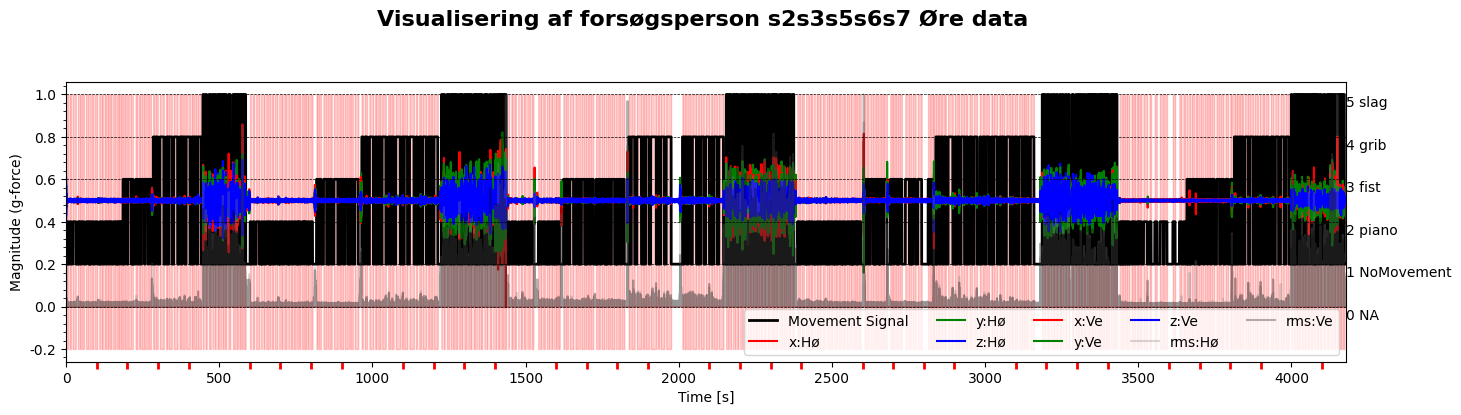

In [ ]:
#@title Plot data


start = timeline_s[0]
slut = timeline_s[-1]
# start = 260
# slut = 300



fig = plt.figure(figsize=[16,4])
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9,
                top=0.8, wspace=0.2,hspace=0.3)
fig.suptitle(f"Visualisering af {subjectName} {dataType} data ", fontsize= 16, fontweight="bold")

ax = plt.subplot(111)


m = np.zeros(len(moevment))
m[moevment>1] = 5
ax.fill_between(timeline_s ,m,color="r",alpha=0.2)
m[moevment>1] = -1
ax.fill_between(timeline_s ,m,color="r",alpha=0.2)


ax.plot(timeline_s,moevment,label='Movement Signal',color='black',linewidth=2)

color=['r','g','b','r','g','b',('grey', 0.3),('k', 0.3)]

scaleFactor = 5
for idx,id in enumerate(labels):
    ax.plot(timeline_s ,(data[id])*scaleFactor,label=id,color=color[idx])


for (val,name ) in enumerate(Movement):
    ax.axhline(y=val, color='k', linestyle='--',linewidth=0.5) #label=name ,
    t = (str(val) + " "+ name.name )
    ax.text(slut+0.2,val-0.3,(t),ha='left')


ax.legend(loc='lower right',ncol=5)


# ax.set_ylim((-1.5,6))
ax.set_xlim((start,slut))
# plt.xlim((31.5,33.5))

ax.minorticks_on()
ax.tick_params(axis='x',which='minor', length=5, color='r',width=2)


ax.set_xlabel("Time [s]")
ax.set_ylabel('Magnitude (g-force)')
ax.set_yticks([-1,0, 1, 2,3,4,5], [-1/scaleFactor,0/scaleFactor,1/scaleFactor,2/scaleFactor,3/scaleFactor,4/scaleFactor,5/scaleFactor])

plt.show()


# Segment data

In [ ]:
#@title segment_and_classify def

import pandas as pd
from numpy.fft import fft, ifft

def segment_and_classify(data,lable, window_size_s=1, overlap_s=0, fs=100):

   # Convert window size and overlap to samples
    window_samples = int(window_size_s * fs)
    overlap_samples = int(overlap_s * fs)

    segmented_data = []
    labled_data_dominate = []
    labled_data_samplewise = []
    segmented_fft = []


    for i in range(0, len(data) - window_samples + 1, window_samples - overlap_samples):
        segment = data[i:i + window_samples]
        samplewise = lable[i:i + window_samples]

        # Find the most frequent movement label within the segment
        dominant_movement = samplewise.mode()[0]  # Use iloc[0] to handle cases with multiple modes
        # print(samplewise)
        # print(dominant_movement)


        chs = (torch.transpose(segment, 0, 1))
        # display(chs.shape)

        fft_arr = np.zeros((chs.shape), dtype=np.complex128)
        # display(fft_arr.shape)

        for i, ch in enumerate(chs):
          # display(i)
          # display(ch.shape)
          # display(fft_arr[i].shape)
          f = fft(ch)
          f[0] = f[1]
          # display(f.shape)
          fft_arr[i] = f



        fft_tensor = torch.tensor(fft_arr, dtype=torch.complex128)

        segmented_data.append(chs)
        segmented_fft.append(fft_tensor)
        labled_data_dominate.append(dominant_movement)
        labled_data_samplewise.append(samplewise)




    segmented_data = np.array(segmented_data)
    segmented_data = torch.tensor(segmented_data, dtype=torch.float,requires_grad=True)

    segmented_fft = np.array(segmented_fft)
    segmented_fft = torch.tensor(segmented_fft, dtype=torch.complex128,requires_grad=True)


    labled_data_samplewise = np.array(labled_data_samplewise)
    labled_data_samplewise = torch.tensor(labled_data_samplewise, dtype=torch.long)

    labled_data_dominate = np.array(labled_data_dominate)
    labled_data_dominate = torch.tensor(labled_data_dominate, dtype=torch.long)


    return segmented_data,segmented_fft, labled_data_samplewise, labled_data_dominate



In [ ]:
#@title segment_and_classify Execute




raw_org_tensor = torch.tensor(raw_org, dtype=torch.float32)
label_org_tensor = torch.tensor(label_org, dtype=torch.long)

windowSize_Sec = 1.0
overlap_Sec = 0.0

segmented_data_tensor, segmented_fft_tensor,labled_data_samplewise_tensor, labled_data_dominate_tensor = segment_and_classify(raw_org_tensor,label_org_tensor,window_size_s=windowSize_Sec,overlap_s=overlap_Sec)




print((f'''
Dataset shapes:
    orginal rawda: {raw_org_tensor.shape}
    orginal label: {label_org_tensor.shape}

'''))


print((f'''
Dataset shapes:
    segmented_data: {segmented_data_tensor.shape}
      raw requires_grad: {segmented_data_tensor.requires_grad}
    segmented_fft:  {segmented_fft_tensor.shape}
      fft requires_grad: {segmented_fft_tensor.requires_grad}
    labled_data_samplewise: {labled_data_samplewise_tensor.shape}
    labled_data_dominate:   {labled_data_dominate_tensor.shape}
'''))

# i = 0
# print(labled_data_samplewise_tensor[i])
# print(labled_data_dominate_tensor[i])



Dataset shapes:
    orginal rawda: torch.Size([417799, 8])
    orginal label: torch.Size([417799])



Dataset shapes:
    segmented_data: torch.Size([4177, 8, 100])
      raw requires_grad: True
    segmented_fft:  torch.Size([4177, 8, 100])
      fft requires_grad: True
    labled_data_samplewise: torch.Size([4177, 100])
    labled_data_dominate:   torch.Size([4177])



In [ ]:
from collections import defaultdict
from functools import partial
from multiprocessing import cpu_count
from pathlib import Path
from textwrap import dedent
from numpy.fft import fft, ifft

from torchsummary import summary

from collections import defaultdict

In [ ]:
#@title compute_distribution def

# Function to compute class distribution
def compute_distribution(targets, name):
    unique, counts = np.unique(targets, return_counts=True)
    percentages = (counts / len(targets)) * 100
    distribution_df = pd.DataFrame({
        "Value": unique,
        "Count": counts,
        "Percentage": percentages.round(1)
    })
    print(f"{name} Distribution:")
    print(distribution_df.to_string(index=False))
    print()
    return distribution_df


In [ ]:






print((f'''
Dataset shapes:
    segmented_data: {segmented_data_tensor.shape}
      raw requires_grad: {segmented_data_tensor.requires_grad}
    segmented_fft: {segmented_fft_tensor.shape}
      fft requires_grad: {segmented_fft_tensor.requires_grad}
    labled_data_samplewise: {labled_data_samplewise_tensor.shape}
      samplewise requires_grad: {labled_data_samplewise_tensor.requires_grad}
    labled_data_dominate: {labled_data_dominate_tensor.shape}
      dominate requires_grad: {labled_data_dominate_tensor.requires_grad}

'''))


train_dist = compute_distribution(labled_data_dominate_tensor, "Total")


Dataset shapes:
    segmented_data: torch.Size([4177, 8, 100])
      raw requires_grad: True
    segmented_fft: torch.Size([4177, 8, 100])
      fft requires_grad: True
    labled_data_samplewise: torch.Size([4177, 100])
      samplewise requires_grad: False
    labled_data_dominate: torch.Size([4177])
      dominate requires_grad: False


Total Distribution:
 Value  Count  Percentage
     1   2141        51.3
     2    445        10.7
     3    456        10.9
     4    717        17.2
     5    418        10.0



In [ ]:
#@title split_balanced_data DEf and Execute

# from numpy import zeros, newaxis





def split_balanced_data(data, targets, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15,GetFirst=None):
    """
    Splits data into train, validation, and test sets with balanced class distribution.

    Parameters:
        data (tuple): A tuple of two arrays (raw_arr, fft_arr).
        targets (array-like): Array of class labels corresponding to `data`.
        train_ratio (float): Proportion of data for training.
        val_ratio (float): Proportion of data for validation.
        test_ratio (float): Proportion of data for testing.

    Returns:
        dict: A dictionary containing train, val, and test splits for data and targets.
    """
    segmented_data_tensor, segmented_fft_tensor = data
    labled_data_dominate_tensor,labled_data_samplewise_tensor = targets

    if type(segmented_data_tensor) == torch.Tensor:
      raw_arr = segmented_data_tensor.detach().numpy()
      fft_arr = segmented_fft_tensor.detach().numpy()
      targets = labled_data_dominate_tensor.detach().numpy()
      target_samplewise = labled_data_samplewise_tensor.detach().numpy()
      print("Converted fra tensor til np.array")
    else:
      print("Var allrede np.array")
      raw_arr = segmented_data_tensor
      fft_arr = segmented_fft_tensor
      targets = labled_data_dominate_tensor
      target_samplewise = labled_data_samplewise_tensor


    assert len(raw_arr) == len(fft_arr) == len(targets), "Data and targets must have the same length."
    assert np.isclose(train_ratio + val_ratio + test_ratio, 1.0), "Ratios must sum to 1."

    # Identify unique classes and their indices
    unique_classes, counts = np.unique(targets, return_counts=True)
    display(unique_classes)
    display(counts)
    print("BEfore here")


    class_indices = defaultdict(list)

    for idx, label in enumerate(targets):
    #   if len(class_indices[label])<GetFirst:
        class_indices[label].append(idx)


    # Shuffle indices for each class
    for label in unique_classes:
        np.random.shuffle(class_indices[label])




    # Shuffle indices for each class
    for label in unique_classes:
      if GetFirst == None:
        class_indices[label]  = class_indices[label]
      else:
        class_indices[label]  = class_indices[label][:GetFirst]


    train_indices, val_indices, test_indices = [], [], []

    for label in unique_classes:
        # display(f"label: {(label)}")

        # Determine split sizes for the current class
        n = len(class_indices[label])


        # display(f"label_n: {(n)}")
        n_train = int(n * train_ratio)
        n_val = int(n * val_ratio)

        # Split indices for this class
        train_indices.extend(class_indices[label][:n_train])
        val_indices.extend(class_indices[label][n_train:n_train + n_val])
        test_indices.extend(class_indices[label][n_train + n_val:])



    train_indices.sort()
    val_indices.sort()
    test_indices.sort()



    display(f"train_indices: {len(train_indices)}")
    display(f"val_indices: {len(val_indices)}")
    display(f"test_indices: {len(test_indices)}")

    def get_split(indices):
      return {
        'data_raw': segmented_data_tensor[indices],
        'data_fft': segmented_fft_tensor[indices],
        'target_overall': labled_data_dominate_tensor[indices],
        'target_samplewise': labled_data_samplewise_tensor[indices],
        }



    train_data = get_split(train_indices)
    val_data = get_split(val_indices)
    test_data = get_split(test_indices)

    display(train_data.keys())

    # Compute and display distributions
    train_dist = compute_distribution(train_data['target_overall'], "Training Set")
    val_dist = compute_distribution(val_data['target_overall'], "Validation Set")
    test_dist = compute_distribution(test_data['target_overall'], "Test Set")

    train_data['dist'] = train_dist
    val_data['dist'] = val_dist
    test_data['dist'] = test_dist

    return {
        'train': train_data,
        'val': val_data,
        'test': test_data
    }



print((f'''
Dataset shapes:
    segmented_data: {segmented_data_tensor.shape}
      raw requires_grad: {segmented_data_tensor.requires_grad}
    segmented_fft: {segmented_fft_tensor.shape}
      fft requires_grad: {segmented_fft_tensor.requires_grad}
    labled_data_samplewise: {labled_data_samplewise_tensor.shape}
      samplewise requires_grad: {labled_data_samplewise_tensor.requires_grad}
    labled_data_dominate: {labled_data_dominate_tensor.shape}
      dominate requires_grad: {labled_data_dominate_tensor.requires_grad}

'''))




# Example Usage
np.random.seed(42)  # For reproducibility



splits = split_balanced_data((segmented_data_tensor, segmented_fft_tensor), (labled_data_dominate_tensor,labled_data_samplewise_tensor),
                             train_ratio=0.80,
                             val_ratio=0.19,
                             test_ratio=0.01,
                             GetFirst=None#400
                            #  GetFirst=1250 #of each class
                            #  GetFirst=400 #of each class
                             )









Dataset shapes:
    segmented_data: torch.Size([4177, 8, 100])
      raw requires_grad: True
    segmented_fft: torch.Size([4177, 8, 100])
      fft requires_grad: True
    labled_data_samplewise: torch.Size([4177, 100])
      samplewise requires_grad: False
    labled_data_dominate: torch.Size([4177])
      dominate requires_grad: False


Converted fra tensor til np.array


array([1, 2, 3, 4, 5])

array([2141,  445,  456,  717,  418])

BEfore here


'train_indices: 3339'

'val_indices: 791'

'test_indices: 47'

dict_keys(['data_raw', 'data_fft', 'target_overall', 'target_samplewise'])

Training Set Distribution:
 Value  Count  Percentage
     1   1712        51.3
     2    356        10.7
     3    364        10.9
     4    573        17.2
     5    334        10.0

Validation Set Distribution:
 Value  Count  Percentage
     1    406        51.3
     2     84        10.6
     3     86        10.9
     4    136        17.2
     5     79        10.0

Test Set Distribution:
 Value  Count  Percentage
     1     23        48.9
     2      5        10.6
     3      6        12.8
     4      8        17.0
     5      5        10.6



In [ ]:
#@title create_loaders def and exe


def create_loaders(data, bs=128, jobs=0,printer=False):
    """Wraps the datasets returned by create_datasets function with data loaders."""

    print(data['dist'])
    raw_tensor = data['data_raw']
    fft_tensor = data['data_fft']
    target_overall_tensor = data['target_overall']
    target_samplewise_tensor = data['target_samplewise']



    if printer:
      display("___her____________________")
      # loss = raw_tensor  # Ensure `some_tensor` has `requires_grad=True`
      print(raw_tensor.requires_grad)  # Should print True
      print(fft_tensor.requires_grad)  # Should print True
      display("___der____________________")


    fft_tensor=fft_tensor.abs()






    print(f"  Raw Shape:_________________________{raw_tensor.shape}")
    print(f"  FFT Shape:_________________________{fft_tensor.shape}")
    print(f"  Overall Target Shape:______________{target_overall_tensor.shape}")
    print(f"  Samplewise Target Shape:___________{target_samplewise_tensor.shape}")


    #detach and make it to tensor again
    raw_tensor = raw_tensor.detach().clone()
    fft_tensor = fft_tensor.detach().clone()

    raw_tensor.requires_grad_()
    fft_tensor.requires_grad_()



    ds = TensorDataset(
        raw_tensor.float(),
        fft_tensor.float(),
        target_overall_tensor,
        target_samplewise_tensor
        )

    dl = DataLoader(ds, batch_size=bs, shuffle=True, num_workers=jobs)
    return ds,dl

_, trn_dl = create_loaders(splits['train'], bs=256,jobs=0,printer=False)
print()
_,val_dl = create_loaders(splits['val'] , bs=256,jobs=0)
print()
_,tst_dl = create_loaders(splits['test'], bs=256,jobs=0)





   Value  Count  Percentage
0      1   1712        51.3
1      2    356        10.7
2      3    364        10.9
3      4    573        17.2
4      5    334        10.0
  Raw Shape:_________________________torch.Size([3339, 8, 100])
  FFT Shape:_________________________torch.Size([3339, 8, 100])
  Overall Target Shape:______________torch.Size([3339])
  Samplewise Target Shape:___________torch.Size([3339, 100])

   Value  Count  Percentage
0      1    406        51.3
1      2     84        10.6
2      3     86        10.9
3      4    136        17.2
4      5     79        10.0
  Raw Shape:_________________________torch.Size([791, 8, 100])
  FFT Shape:_________________________torch.Size([791, 8, 100])
  Overall Target Shape:______________torch.Size([791])
  Samplewise Target Shape:___________torch.Size([791, 100])

   Value  Count  Percentage
0      1     23        48.9
1      2      5        10.6
2      3      6        12.8
3      4      8        17.0
4      5      5        10.6
  Raw Sh

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device:',device)

def accuracy(scores, yb):
    score2prob = nn.Softmax(dim=1)
    preds = torch.argmax(score2prob(scores), dim=1)
    return (preds == yb).float().mean()

# print('Accuracy', accuracy(scores,labels))

Device: cpu


# Model

In [ ]:
#@title LogisticRegressionModel def and genereate

# from re import X
import torch
import torch.nn as nn
from sklearn.linear_model import LogisticRegression
import numpy as np



# Same as linear regression!
class LogisticRegressionModel(nn.Module):
    def __init__(self, inputChannels=8, Convertions_Layer=4,sequanceLen=100, num_classes=6):
        super(LogisticRegressionModel, self).__init__()

        self.inChan = inputChannels
        self.Relu = nn.ReLU()




        # self.conv1RAW = nn.Conv1d(inputChannels, Convertions_Layer, kernel_size=50, padding=0,stride=25)
        # self.conv1FFT = nn.Conv1d(inputChannels, Convertions_Layer, kernel_size=50, padding=0,stride=25)
        # self.linearRaw = nn.Linear(Convertions_Layer*3, Convertions_Layer)
        # self.linearFFT = nn.Linear(Convertions_Layer*3, Convertions_Layer)



        self.conv1RAW = nn.Conv1d(inputChannels, Convertions_Layer, kernel_size=100, padding=0,stride=1)
        self.conv1FFT = nn.Conv1d(inputChannels, Convertions_Layer, kernel_size=100, padding=0,stride=1)
        self.linearRaw = nn.Linear(Convertions_Layer, Convertions_Layer)
        self.linearFFT = nn.Linear(Convertions_Layer, Convertions_Layer)


        self.fcClass = nn.Linear(Convertions_Layer*2, num_classes) #Hvis både fft og raw bruges
        # self.fcClassOnlyRaw = nn.Linear(Convertions_Layer, num_classes) #Hvis kun Raw bruges

        self.act_output = nn.Sigmoid()

        self.probs = nn.Softmax(dim=1)

    def forward(self, x):


        #Extract data
        fft = x[:,self.inChan:,:]
        #Conv FFT
        fft = self.conv1FFT(fft)
        fft = fft.reshape(fft.shape[0], -1)
        fft = self.Relu(self.linearFFT(fft))


        #Extract data
        x = x[:,0:self.inChan,:]
        # print(f"Raw data shape: {x.shape}")
        # Conv Raw
        x = self.conv1RAW(x)
        # print(f"after covn data: {x.shape}")
        x = x.reshape(x.shape[0], -1)
        # print(f"after reshape: {x.shape}")
        x = self.Relu(self.linearRaw(x))
        # print(f"after linearRaw: {x.shape}")
        # out = self.fcClassOnlyRaw(x)
        # print(f"after ClassOnlyRaw: {x.shape}")

        #Combine data
        combine = torch.cat((x, fft), 1)
        out = (self.fcClass(combine))



        out = self.probs(out)



        return out



model = LogisticRegressionModel(sequanceLen=100, num_classes=6,Convertions_Layer=6).to(device=device)


inputTestData = torch.tensor(np.zeros((256,8,100))).float().to(device=device)
inputTestDataFFT = torch.tensor(np.zeros((256,8,100))).float().to(device=device)
# print(inputTestData.shape)

input = torch.cat((inputTestData,inputTestDataFFT), 1)
pred_overall_probs = model(input)
pred_overall_probs2 = model(input)




print(pred_overall_probs.shape)
print(pred_overall_probs2.shape)
pred_overall_probs =  torch.unsqueeze(pred_overall_probs, 0)
pred_overall_probs2 =  torch.unsqueeze(pred_overall_probs2, 0)

probs = None
if probs == None:
  probs = pred_overall_probs

probs = torch.cat((probs, pred_overall_probs2), 0)



print(probs)

# print("Done")


# from torchsummary import summary


# # model = LogisticRegressionModel(sequanceLen=100, num_classes=6,Convertions_Layer=6).to(device=device)

# summary(model.to(device), input_size=(16,100))



torch.Size([256, 6])
torch.Size([256, 6])
tensor([[[0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978],
         [0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978],
         [0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978],
         ...,
         [0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978],
         [0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978],
         [0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978]],

        [[0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978],
         [0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978],
         [0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978],
         ...,
         [0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978],
         [0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978],
         [0.1451, 0.1416, 0.1785, 0.1829, 0.1541, 0.1978]]],
       grad_fn=<CatBackward0>)


In [ ]:
#@title Make dataset and dataloaders
trainset, trn_dl = create_loaders(splits['train'], bs=256,jobs=0)
testset, val_dl = create_loaders(splits['val'] , bs=150,jobs=0)
tst_ds, tst_dl = create_loaders(splits['test'], bs=150,jobs=0)
# trainset = splits['train']
# testset = splits['test']


for x_raw, x_fft, true_overall_value, true_samplewise_value in trn_dl:
  # x_raw.requires_grad_()
  print(x_raw.requires_grad)
  print(x_raw.shape)
  print(x_fft.requires_grad)
  print(x_fft.shape)
  display(x_raw[0,:,0:5])
  display(x_fft[0,:,0:5])
  break

   Value  Count  Percentage
0      1   1712        51.3
1      2    356        10.7
2      3    364        10.9
3      4    573        17.2
4      5    334        10.0
  Raw Shape:_________________________torch.Size([3339, 8, 100])
  FFT Shape:_________________________torch.Size([3339, 8, 100])
  Overall Target Shape:______________torch.Size([3339])
  Samplewise Target Shape:___________torch.Size([3339, 100])
   Value  Count  Percentage
0      1    406        51.3
1      2     84        10.6
2      3     86        10.9
3      4    136        17.2
4      5     79        10.0
  Raw Shape:_________________________torch.Size([791, 8, 100])
  FFT Shape:_________________________torch.Size([791, 8, 100])
  Overall Target Shape:______________torch.Size([791])
  Samplewise Target Shape:___________torch.Size([791, 100])
   Value  Count  Percentage
0      1     23        48.9
1      2      5        10.6
2      3      6        12.8
3      4      8        17.0
4      5      5        10.6
  Raw Shap

tensor([[0.4962, 0.4970, 0.4988, 0.5048, 0.5039],
        [0.5013, 0.5017, 0.5023, 0.5063, 0.5039],
        [0.4956, 0.4952, 0.4954, 0.4953, 0.4946],
        [0.4964, 0.4989, 0.5044, 0.5052, 0.5010],
        [0.5049, 0.5049, 0.5015, 0.5033, 0.4993],
        [0.5037, 0.5061, 0.5058, 0.5012, 0.5031],
        [0.0127, 0.0125, 0.0113, 0.0196, 0.0164],
        [0.0152, 0.0169, 0.0159, 0.0135, 0.0070]], grad_fn=<SliceBackward0>)

tensor([[0.0237, 0.0237, 0.0326, 0.0508, 0.0252],
        [0.0342, 0.0342, 0.0378, 0.0043, 0.0371],
        [0.0439, 0.0439, 0.0488, 0.0236, 0.0262],
        [0.0052, 0.0052, 0.0132, 0.0761, 0.0483],
        [0.0176, 0.0176, 0.0774, 0.0204, 0.0076],
        [0.0565, 0.0565, 0.0787, 0.0176, 0.0280],
        [0.0928, 0.0928, 0.0243, 0.0879, 0.0539],
        [0.0749, 0.0749, 0.0384, 0.0660, 0.0218]], grad_fn=<SliceBackward0>)

In [ ]:
#@title get model essensial def


#SGD + Momentum
def momentum_optimizer(model,lr=0.1):
    return torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

# Adagrad
def adagrad_optimizer(model,lr=0.1):
  return torch.optim.Adagrad(model.parameters(), lr=lr, lr_decay=0.0, weight_decay=0.0, initial_accumulator_value=0)

# RMSProp
def rmsprop_optimizer(model,lr=0.1):
  return torch.optim.RMSprop(model.parameters(), lr=lr, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)

# Adam
def adam_optimizer(model,lr=0.001):
  return torch.optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

# Train with custom optimizer (on small subset)
# reset_parameters(model) # Reset network weights
# train_loss_history = fit(model,opt_func=momentum_optimizer,bs=10,epochs=5,batches_per_epoch=4)

def GetCombinationsnumber(learning_rates,Convertions_Layers,optimizers):
  TotalCombination = len(learning_rates)*len(Convertions_Layers)*len(optimizers)
  print(f"Total Combination: {TotalCombination}")
  return TotalCombination


def GetCombinationsModels(learning_rate=0.01,Convertions_Layers=4,optimizer_name="Adam"):
    model = LogisticRegressionModel(
      sequanceLen=100,
      num_classes=6,
      Convertions_Layer=Convertions_Layers
      ).to(device=device)

    if optimizer_name == "Adam":
      optimizer = adam_optimizer(model,lr=learning_rate)
    elif optimizer_name == "rmsprop":
      optimizer = rmsprop_optimizer(model,lr=learning_rate)
    elif optimizer_name == "adagrad":
      optimizer = adagrad_optimizer(model,lr=learning_rate)
    else:
      optimizer = momentum_optimizer(model,lr=learning_rate)

    criterion = nn.CrossEntropyLoss()
    # criterion = nn.MSELoss()
    return model,optimizer,criterion


In [ ]:
def timeprint(time):
  m = int(time/60)
  s = int(time%60)
  ms = int(time%1*1000)
  return m,s,ms


def epochPrint(itertion,epoch,num_epochs,loss,val_loss,val_BatchCount,accuracy,combi_min,combi_sec,Estimat_min=None, Estimat_sec=None,Epoch_min=None,Epoch_sec=None,Epoch_msec=None):
  if Estimat_min == None:
    print(f'Iteration: {"%04d" % itertion}. Epoch: {"%03d" % epoch}/{"%03d" % num_epochs}.   TrainLoss: {"%.2f" % loss}.  ValLoss: {"%.2f" % (val_loss/val_BatchCount)}. Accuracy: {"%.1f" % accuracy} \t Combination time [min:sec]: {"%02d" % combi_min}:{"%02d" % combi_sec}.' )
  else:
    print(f'Iteration: {"%04d" % itertion}. Epoch: {"%03d" % epoch}/{"%03d" % num_epochs}.   TrainLoss: {"%.2f" % loss}.  ValLoss: {"%.2f" % (val_loss/val_BatchCount)}. Accuracy: {"%.1f" % accuracy} \t Combination time [min:sec]: {"%02d" % combi_min}:{"%02d" % combi_sec} / {"%02d" % Estimat_min}:{"%02d" % Estimat_sec}    Epoch time [min:sec.mSec]: {"%02d" % Epoch_min}:{"%02d" % Epoch_sec}.{"%03d" % Epoch_msec}' )


import time


# Train loop

In [ ]:
learning_rates = [0.1,0.01,0.001]
learning_rates = [0.01]
learning_rates = [0.01,0.001]
learning_rates = [0.001]

Convertions_Layers = [2,4,6,8]
Convertions_Layers = [2,4,8]
Convertions_Layers = [4,8,12]
Convertions_Layers = [4,8,12,16,32,64]
Convertions_Layers = [16,32,64]

optimizers = ["Adam", "rmsprop","adagrad", "Momentum" ]
optimizers = ["Momentum","Adam"]
optimizers = ["Adam"]
torch.manual_seed(0)

combination = GetCombinationsnumber(learning_rates,Convertions_Layers,optimizers)
HyperResult = [{} for _ in range(combination)]

num_epochs =500

import time
TotalStartTime = time.time()

for i in range(combination):

  CombinationStartTime = time.time()
  print()
  print(f"Combination: {i+1}/{combination}")

  #convert i onto combination of the three parametre
  learning_rate_index = i % len(learning_rates)
  learning_rate = learning_rates[learning_rate_index]
  print(f"learning_rate: {learning_rate}")

  Convertions_Layer_index = (i // len(learning_rates)) % len(Convertions_Layers)
  Convertions_Layer = Convertions_Layers[Convertions_Layer_index]
  print(f"Convertions_Layer: {Convertions_Layer}")

  optimizer_index = (i // len(learning_rates) // len(Convertions_Layers)) % len(optimizers)
  optimizer_name = optimizers[optimizer_index]
  print(f"optimizer_name: {optimizer_name}")


  HyperResult[i]["learning_rate"] = learning_rate
  HyperResult[i]["Convertions_Layer"] = Convertions_Layer
  HyperResult[i]["optimizer_name"] = optimizer_name
  print("________________________ Model Starter her ___________________________________________")


  train_loader = trn_dl
  test_loader = val_dl



  model,optimizer,criterion = GetCombinationsModels(
    learning_rate=learning_rate,
    Convertions_Layers=Convertions_Layer,
    optimizer_name=optimizer_name)


  # summary(model.to(device), input_size=(8,100))


  itertion = 0
  epoch = 0
  train_loss_history = []
  train_acc_history = []
  valid_loss_history = []
  valid_acc_history = []
  plot_time_train = []
  plot_time_valid = []
  output_Probs = []
  trues_Pred = []

  early_stop_thresh = 50
  best_accuracy = -1
  best_epoch = -1
  for epoch in range(num_epochs):
      EpochStartTime = time.time()
      epoch += 1
      ContuniuesIteration = 0
      model.train()



      for x_raw, x_fft, true_overall_value, true_samplewise_value in train_loader:

          # Load images as Variable
          images = x_raw.to(device)
          x_fft = x_fft.to(device)
          labels = true_overall_value.to(device)
          # images.requires_grad_()

          # Clear gradients w.r.t. parameters
          optimizer.zero_grad()

          # Forward pass to get output/logits
          input = torch.cat((images,x_fft), 1)

          outputs = model(input)

          # Calculate Loss: softmax --> cross entropy loss
          loss = criterion(outputs, labels)
          train_loss_history.append(loss.cpu().detach().numpy())
          plot_time_train.append(itertion)

          # Getting gradients w.r.t. parameters
          loss.backward()

          # Updating parameters
          optimizer.step()

          if itertion==0 or itertion % 4 == 0:
              # Calculate Accuracy
              correct = 0
              total = 0


              val_loss = 0
              val_BatchCount = 0
              model.eval()
              with torch.no_grad():
                # Iterate through test dataset
                for  x_raw, x_fft, true_overall_value, true_samplewise_value in test_loader:
                    images = x_raw.to(device)
                    x_fft = x_fft.to(device)

                    labels = true_overall_value.to(device)
                    # Forward pass only to get logits/output
                    input = torch.cat((images,x_fft), 1)
                    outputs = model(input)


                    # Get predictions from the maximum value
                    _, predicted = torch.max(outputs.data, 1)

                    # Total number of labels
                    total += labels.size(0)
                    val_BatchCount+=1

                    # Total correct predictions
                    correct += (predicted == labels).sum()

                    val_loss += criterion(outputs, labels).cpu().detach().numpy()


                accuracy = 100 * correct / total
                valid_acc_history.append(accuracy.cpu().detach().numpy())
                valid_loss_history.append(val_loss/val_BatchCount)
                plot_time_valid.append(itertion)




          itertion += 1
          ContuniuesIteration += 1


          # if itertion % 10 == 0:
          if epoch==1 or epoch % 10 == 0:

            EpochEndTime = time.time()
            EpochDiff = EpochEndTime - EpochStartTime



            m = (timeprint(EpochDiff)[0])
            s = (timeprint(EpochDiff)[1])
            ms = (timeprint(EpochDiff)[2])



            CombinationDiffTime = EpochEndTime - CombinationStartTime
            mReal =  (timeprint(CombinationDiffTime)[0])
            sReal =  (timeprint(CombinationDiffTime)[1])

            AvgEpochTime = CombinationDiffTime/epoch
            EctCombinationEndTime =  AvgEpochTime*num_epochs
            mEst = (timeprint(EctCombinationEndTime)[0])
            sEst = (timeprint(EctCombinationEndTime)[1])



            if ContuniuesIteration == 1:
                # Print Loss
                epochPrint(itertion,epoch,num_epochs,loss.item(),val_loss,val_BatchCount,accuracy,mReal,sReal,mEst,sEst,m,s,ms)

      # print(f"Epoch {epoch} -> accuracy {accuracy}")
      if accuracy > best_accuracy+0.5:
        best_accuracy = np.round(accuracy.cpu(),0)
        best_epoch = epoch

        ModelName = f"BestModel/best_model_model_acuuracy_{best_accuracy}_lr_{learning_rate}_Conv_{Convertions_Layer}_opt_{optimizer_name}_Traindon_{TrainedOn}"
        HyperResult[i]["BestModel"] = model.state_dict()
        HyperResult[i]["BestModelName"] = ModelName
        HyperResult[i]["BestModelEpoch"] = best_epoch

        # torch.save(model.state_dict(), ModelName+".pth")
        print("Best model saved at epoch %d" % epoch)
        # print(f"\t {ModelName}")




      elif epoch - best_epoch > early_stop_thresh:
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop



  CombinationEndTime = time.time()
  CombinationDiff = CombinationEndTime - CombinationStartTime

  m = (timeprint(CombinationDiff)[0])
  s = (timeprint(CombinationDiff)[1])

  print(f'________________________Epoch End result___________________________________________________________')
  epochPrint(itertion,epoch,num_epochs,loss.item(),val_loss,val_BatchCount,accuracy,m,s)


  HyperResult[i]["Training time"] = plot_time_train
  HyperResult[i]["Validation time"] = plot_time_valid
  HyperResult[i]["Training Loss"] = train_loss_history
  HyperResult[i]["Validation Loss"] = valid_loss_history
  HyperResult[i]["Training Accuracy"] = train_acc_history
  HyperResult[i]["Validation Accuracy"] = valid_acc_history
  HyperResult[i]["Model Parameter"] = model.get_parameter
  HyperResult[i]["Pred_Probs"] = output_Probs
  HyperResult[i]["True_Pred"] = trues_Pred


  TrainedOn

  ModelName = f"model_acuuracy_{valid_acc_history[-1]}_lr_{learning_rate}_Conv_{Convertions_Layer}_opt_{optimizer_name}_Traindon_{TrainedOn}"
  HyperResult[i]["SavingName"] = ModelName
  print(ModelName)
  torch.save(model.state_dict(), ModelName+".pth")

  ModelName = HyperResult[i]["BestModelName"]
  torch.save(HyperResult[i]["BestModel"], ModelName+".pth" )
  print(ModelName)


lowestIdx = None
lewestValue = None
bestModel = None



Total Combination: 3

Combination: 1/3
learning_rate: 0.001
Convertions_Layer: 16
optimizer_name: Adam
________________________ Model Starter her ___________________________________________
Iteration: 0001. Epoch: 001/500.   TrainLoss: 1.80.  ValLoss: 1.79. Accuracy: 10.6 	 Combination time [min:sec]: 00:07 / 60:33    Epoch time [min:sec.mSec]: 00:01.354
Best model saved at epoch 1
Best model saved at epoch 3
Iteration: 0127. Epoch: 010/500.   TrainLoss: 1.44.  ValLoss: 1.44. Accuracy: 58.7 	 Combination time [min:sec]: 02:33 / 127:30    Epoch time [min:sec.mSec]: 00:01.334
Iteration: 0267. Epoch: 020/500.   TrainLoss: 1.49.  ValLoss: 1.45. Accuracy: 58.5 	 Combination time [min:sec]: 05:18 / 132:45    Epoch time [min:sec.mSec]: 00:01.200
Iteration: 0407. Epoch: 030/500.   TrainLoss: 1.46.  ValLoss: 1.47. Accuracy: 59.0 	 Combination time [min:sec]: 08:08 / 135:35    Epoch time [min:sec.mSec]: 00:01.368
Iteration: 0547. Epoch: 040/500.   TrainLoss: 1.41.  ValLoss: 1.45. Accuracy: 58.9 

dict_keys(['learning_rate', 'Convertions_Layer', 'optimizer_name', 'BestModel', 'BestModelName', 'BestModelEpoch', 'Training time', 'Validation time', 'Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy', 'Model Parameter', 'Pred_Probs', 'True_Pred', 'SavingName'])

___________________________________________________________
lowestIdx: 0
lewestValue: 1.4360103607177734
Model nr: 0
lr: 0.001
Convertions_Layer: 16
optimizer_name: Adam
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                [-1, 16, 1]          12,816
            Linear-2                   [-1, 16]             272
              ReLU-3                   [-1, 16]               0
            Conv1d-4                [-1, 16, 1]          12,816
            Linear-5                   [-1, 16]             272
              ReLU-6                   [-1, 16]               0
            Linear-7                    [-1, 6]             198
           Softmax-8                    [-1, 6]               0
Total params: 26,374
Trainable params: 26,374
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB):

None

model_acuuracy_59.03919219970703_lr_0.001_Conv_16_opt_Adam_Traindon_CombinedData_Øre_s2s3s5s6s7


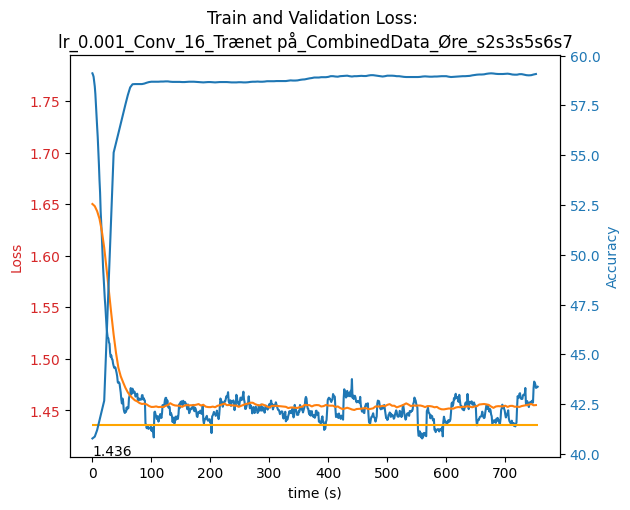

___________________________________________________________
Model nr: 1
lr: 0.001
Convertions_Layer: 32
optimizer_name: Adam
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                [-1, 32, 1]          25,632
            Linear-2                   [-1, 32]           1,056
              ReLU-3                   [-1, 32]               0
            Conv1d-4                [-1, 32, 1]          25,632
            Linear-5                   [-1, 32]           1,056
              ReLU-6                   [-1, 32]               0
            Linear-7                    [-1, 6]             390
           Softmax-8                    [-1, 6]               0
Total params: 53,766
Trainable params: 53,766
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 0.21
Estimated Total 

None

lowestIdx: 1
lewestValue: 1.4291360179583232
model_acuuracy_59.41845703125_lr_0.001_Conv_32_opt_Adam_Traindon_CombinedData_Øre_s2s3s5s6s7


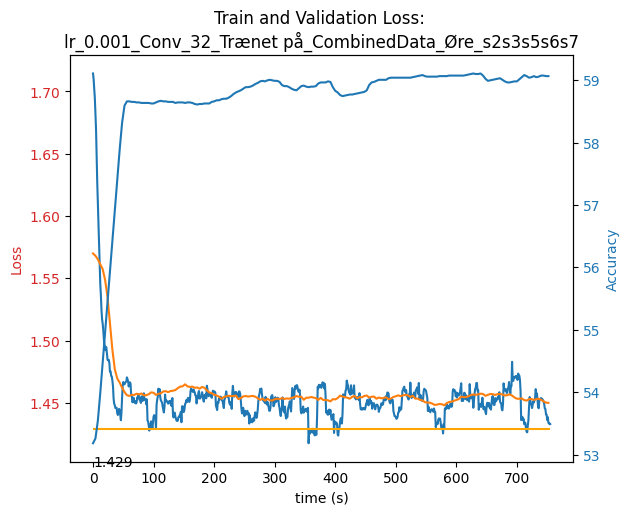

___________________________________________________________
Model nr: 2
lr: 0.001
Convertions_Layer: 64
optimizer_name: Adam
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1                [-1, 64, 1]          51,264
            Linear-2                   [-1, 64]           4,160
              ReLU-3                   [-1, 64]               0
            Conv1d-4                [-1, 64, 1]          51,264
            Linear-5                   [-1, 64]           4,160
              ReLU-6                   [-1, 64]               0
            Linear-7                    [-1, 6]             774
           Softmax-8                    [-1, 6]               0
Total params: 111,622
Trainable params: 111,622
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.00
Params size (MB): 0.43
Estimated Tota

None

lowestIdx: 2
lewestValue: 1.4266959428787231
model_acuuracy_59.03919219970703_lr_0.001_Conv_64_opt_Adam_Traindon_CombinedData_Øre_s2s3s5s6s7


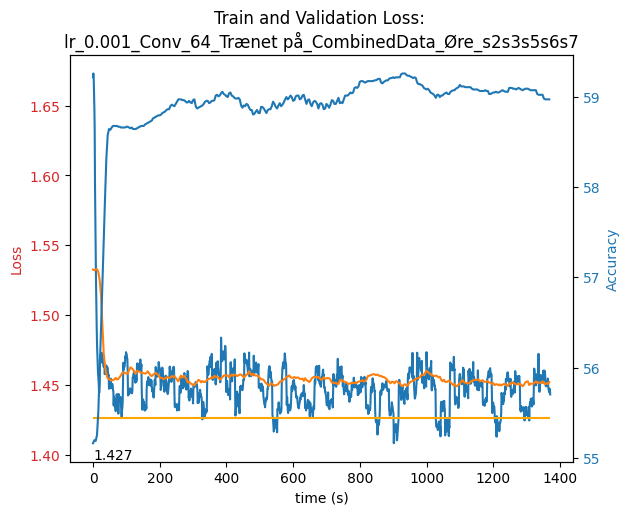

In [ ]:
#@title View all combination
import matplotlib.pyplot as plt

display(HyperResult[0].keys())

lowestIdx = None
lewestValue = None
bestModel = None
for i in range(combination):
  print("___________________________________________________________")
  oneModel = HyperResult[i]
  if bestModel == None:
    bestModel = oneModel
    lowestIdx = i
    lewestValue = np.min(bestModel["Validation Loss"])
    print(f"lowestIdx: {lowestIdx}")
    print(f"lewestValue: {lewestValue}")

  lr = oneModel["learning_rate"]
  Convertions_Layer = oneModel["Convertions_Layer"]
  optimizer_name = oneModel["optimizer_name"]
  print(f"Model nr: {i}")
  print(f"lr: {lr}")
  print(f"Convertions_Layer: {Convertions_Layer}")
  print(f"optimizer_name: {optimizer_name}")

  trn_time = oneModel["Training time"]
  trn_loss = oneModel["Training Loss"]
  trn_acc = oneModel["Training Accuracy"]
  val_time = oneModel["Validation time"]
  val_loss = oneModel["Validation Loss"]
  val_acc = oneModel["Validation Accuracy"]
  ModelName = oneModel["SavingName"]


  model,_,_ = GetCombinationsModels(
    learning_rate=lr,
    Convertions_Layers=Convertions_Layer,
    optimizer_name=optimizer_name)

  modelParametere = oneModel["Model Parameter"]
  model.parameters = modelParametere
  colNames = ["input_size", "output_size", "kernel_size","num_params"]
  display(
      summary(
      model.to(device),
      input_size=(16,100))
  )



  if np.min(val_loss) < lewestValue:
    lowestIdx = i
    lewestValue = np.min(val_loss)
    bestModel = oneModel

    print(f"lowestIdx: {lowestIdx}")
    print(f"lewestValue: {lewestValue}")




  def smooth(y, box_pts):
      box = np.ones(box_pts)/box_pts
      y_smooth = np.convolve(y, box, mode='same')
      return y_smooth



  print(ModelName)
  fig, ax1 = plt.subplots()




  color = 'tab:red'
  ax1.set_xlabel('time (s)')
  ax1.set_ylabel('Loss', color=color)

  from scipy.ndimage import uniform_filter1d

  y_smooth = uniform_filter1d(trn_loss,size=15)
  ax1.plot(trn_time,  y_smooth, label='Training Loss')

  val_loss = uniform_filter1d(val_loss,size=15)
  ax1.plot(val_time,val_loss, label='Validation Loss')

  ax1.tick_params(axis='y', labelcolor=color)

  ax1.hlines(lewestValue,trn_time[0],trn_time[-1],"orange")
  ax1.text(trn_time[0],lewestValue-0.03,str("%0.3f" % lewestValue))

  ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

  color = 'tab:blue'
  ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1

  val_acc = uniform_filter1d(val_acc,size=15)
  ax2.plot(val_time,val_acc, label='Validation Acc')

  ax2.tick_params(axis='y', labelcolor=color)

  fig.tight_layout()  # otherwise the right y-label is slightly clipped


  ModelInfo = f"lr_{lr}_Conv_{Convertions_Layer}_Trænet på_{TrainedOn}"
  plt.title(f"Train and Validation Loss: \n{ModelInfo}")


  plt.show()


Pick the model with the lowest val_loss

In [ ]:
savelowestIdx= lowestIdx
savelewestValue= lewestValue
print(savelowestIdx)
print(savelewestValue)

2
1.4266959428787231


lowestIdx: 2
lewestValue: 1.4266959428787231
Model nr: 2
lr: 0.001
Convertions_Layer: 64
optimizer_name: Adam
lr_0.001_Conv_64_opt_Adam


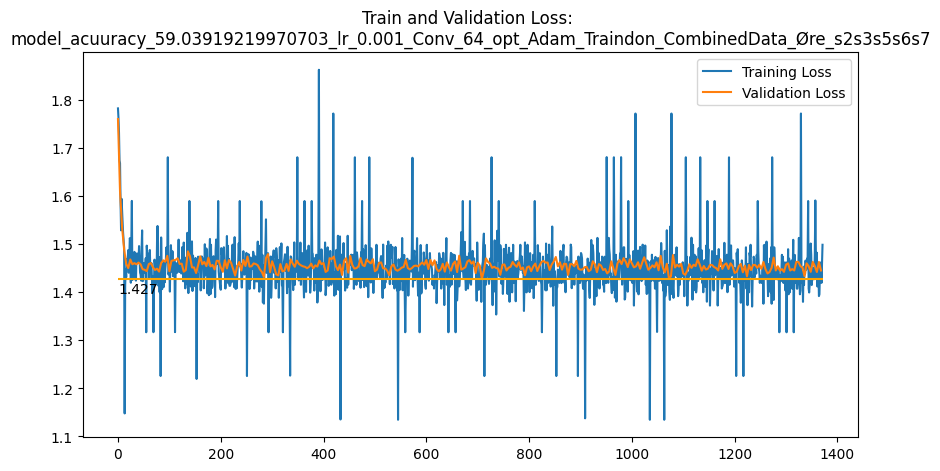

In [ ]:


lowestIdx = savelowestIdx
lewestValue = savelewestValue
print(f"lowestIdx: {lowestIdx}")
print(f"lewestValue: {lewestValue}")


oneModel = HyperResult[lowestIdx]

lr = oneModel["learning_rate"]
Convertions_Layer = oneModel["Convertions_Layer"]
optimizer_name = oneModel["optimizer_name"]
print(f"Model nr: {lowestIdx}")
print(f"lr: {lr}")
print(f"Convertions_Layer: {Convertions_Layer}")
print(f"optimizer_name: {optimizer_name}")

ModelNamePara = f"lr_{lr}_Conv_{Convertions_Layer}_opt_{optimizer_name}"
print(ModelNamePara)

trn_time = oneModel["Training time"]
trn_loss = oneModel["Training Loss"]
trn_acc = oneModel["Training Accuracy"]
val_time = oneModel["Validation time"]
val_loss = oneModel["Validation Loss"]
val_acc = oneModel["Validation Accuracy"]
ModelName = oneModel["SavingName"]


modelParametere = oneModel["Model Parameter"]


model,_,_ = GetCombinationsModels(
  learning_rate=lr,
  Convertions_Layers=Convertions_Layer,
  optimizer_name=optimizer_name)
model.parameters = modelParametere

plt.figure(figsize=(10, 5))
plt.title(f"Train and Validation Loss: \n"+ModelName)
lewestValue = np.min(val_loss)
plt.plot(trn_time,trn_loss, label='Training Loss')
plt.plot(val_time,val_loss, label='Validation Loss')
plt.hlines(lewestValue,trn_time[0],trn_time[-1],"orange")
plt.text(trn_time[0],lewestValue-0.03,str("%0.3f" % lewestValue))
plt.legend()
plt.show()
torch.save(model.state_dict(), ModelName+".pth")




View confisions matrix for the best model

In [ ]:
def printPred(true,pred,org=None,factor=100,fra=0,til=-1):

  y_TruesA = None
  for i in true[fra:til]:
    dd = torch.ones(int(factor))
    clas = i
    # print(clas)
    if y_TruesA == None:
      y_TruesA = dd*clas
    else:
      dd = dd*clas
      y_TruesA = torch.cat((y_TruesA,dd),0)


  predA = None
  for i in pred[fra:til]:
    dd = torch.ones(int(factor))
    clas = i
    # print(clas)
    if predA == None:
      predA = dd*clas
    else:
      dd = dd*clas
      predA = torch.cat((predA,dd),0)


  orgA = None
  for i in org[fra:til]:


    if orgA == None:
      orgA = i
    else:
      dd = i
      orgA = torch.cat((orgA,dd),0)



  fig = plt.figure(figsize = (20,4))
  plt.plot(y_TruesA)
  plt.plot(predA)
  if orgA!=None:
    # print(orgA.shape)
    plt.plot(orgA.detach().numpy())
  plt.show()

In [ ]:
# lowestIdx = 0


oneModel = HyperResult[lowestIdx]
lr = oneModel["learning_rate"]
Convertions_Layer = oneModel["Convertions_Layer"]
optimizer_name = oneModel["optimizer_name"]
print(f"lr: {lr}")
print(f"Convertions_Layer: {Convertions_Layer}")
print(f"optimizer_name: {optimizer_name}")

trn_time = oneModel["Training time"]
trn_loss = oneModel["Training Loss"]
trn_acc = oneModel["Training Accuracy"]
val_time = oneModel["Validation time"]
val_loss = oneModel["Validation Loss"]
val_acc = oneModel["Validation Accuracy"]
modelParametere = oneModel["Model Parameter"]
ModelName = oneModel["SavingName"]

print(ModelName)


model,_,_ = GetCombinationsModels(
  learning_rate=lr,
  Convertions_Layers=Convertions_Layer,
  optimizer_name=optimizer_name)


model.load_state_dict(torch.load(ModelName+".pth", weights_only=True))
model.eval()


# model.parameters = modelParametere



# # plot the train loss and test loss per iteration
# plt.plot(plot_time_train,train_loss_history, label='Training Loss')
# plt.plot(plot_time_valid,valid_loss_history, label='Validation Loss')
# plt.legend()
# plt.show()







lr: 0.001
Convertions_Layer: 64
optimizer_name: Adam
model_acuuracy_59.03919219970703_lr_0.001_Conv_64_opt_Adam_Traindon_CombinedData_Øre_s2s3s5s6s7


LogisticRegressionModel(
  (Relu): ReLU()
  (conv1RAW): Conv1d(8, 64, kernel_size=(100,), stride=(1,))
  (conv1FFT): Conv1d(8, 64, kernel_size=(100,), stride=(1,))
  (linearRaw): Linear(in_features=64, out_features=64, bias=True)
  (linearFFT): Linear(in_features=64, out_features=64, bias=True)
  (fcClass): Linear(in_features=128, out_features=6, bias=True)
  (act_output): Sigmoid()
  (probs): Softmax(dim=1)
)

# Get another model af show stats

BestModel/best_model_model_acuuracy_59.0_lr_0.001_Conv_32_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7
________________________________________________________________
Train data
              precision    recall  f1-score   support

          NO       0.89      0.35      0.51       262
       Piano       0.35      0.70      0.46        46
        Fist       0.27      0.77      0.40        48
        Grib       0.72      0.82      0.76        95
       Punch       0.82      0.97      0.89        61

    accuracy                           0.58       512
   macro avg       0.61      0.72      0.61       512
weighted avg       0.74      0.58      0.59       512



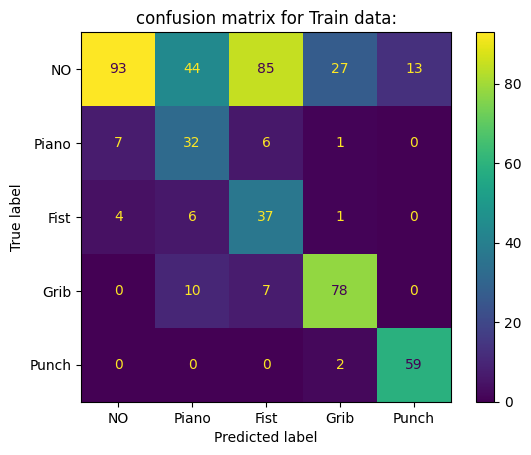

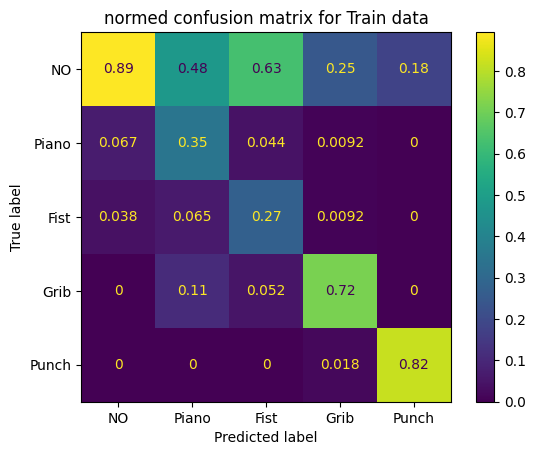

________________________________________________________________
Test data
              precision    recall  f1-score   support

          NO       0.78      0.30      0.44        23
       Piano       0.27      0.60      0.38         5
        Fist       0.38      0.50      0.43         6
        Grib       0.64      0.88      0.74         8
       Punch       0.62      1.00      0.77         5

    accuracy                           0.53        47
   macro avg       0.54      0.66      0.55        47
weighted avg       0.63      0.53      0.52        47



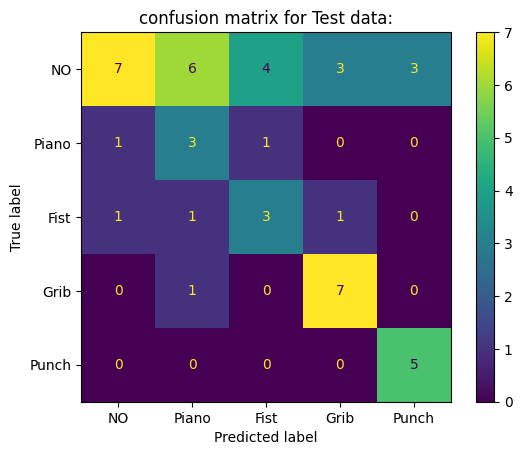

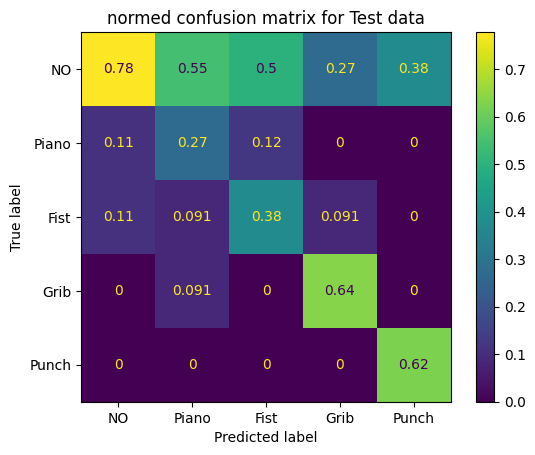

________________________________________________________________
Validation data
              precision    recall  f1-score   support

          NO       0.79      0.36      0.49        76
       Piano       0.33      0.65      0.44        17
        Fist       0.16      0.36      0.22        14
        Grib       0.69      0.83      0.75        24
       Punch       0.83      1.00      0.90        19

    accuracy                           0.55       150
   macro avg       0.56      0.64      0.56       150
weighted avg       0.67      0.55      0.55       150



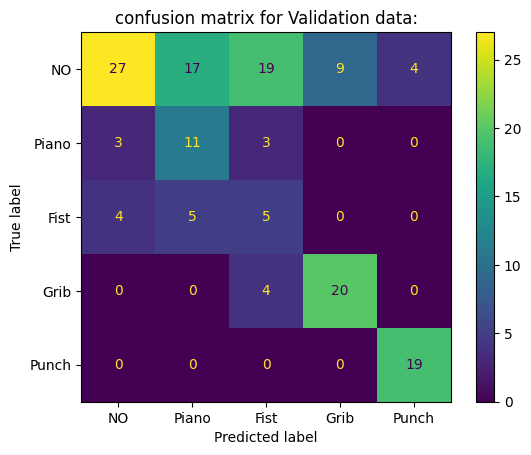

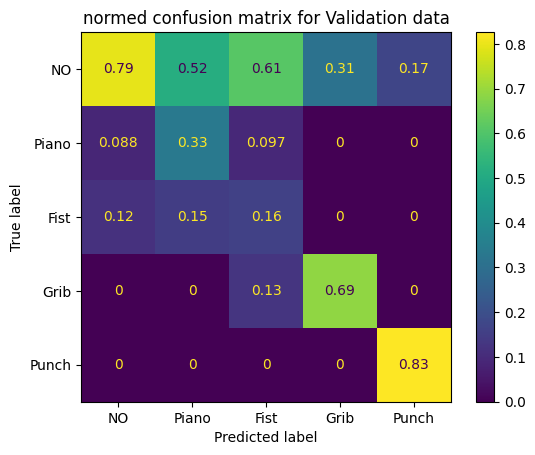

In [ ]:
#@title Evaluate model on training data from sub 3-7

def PredOnLoader(model,loader,device):

  iter_test = 0

  predicteds = []
  y_trues = []
  probs = None


  model.eval()
  for  x_raw, x_fft, true_overall_value, true_samplewise_value in loader:
      iter_test += 1
      # print(f"iter_test = {iter_test}")
      images = x_raw.requires_grad_().to(device)
      x_fft = x_fft.requires_grad_().to(device)


      # Forward pass only to get logits/output
      input = torch.cat((images,x_fft), 1)
      outputs = model(input)


      # print("predicted")
      # print("true_overall_value")
      _, predicted = torch.max(outputs.data, 1)
      # print(predicted.shape)
      # print(true_overall_value.shape)
      if iter_test == 1:
          y_trues = true_overall_value
          probs =  torch.unsqueeze(outputs,0)

          # print('OUTPUTS')
          # print(outputs)
          predicteds = predicted
      else:
          if len(y_trues)==256:
            predicteds = torch.cat((predicteds,predicted),0)
            y_trues = torch.cat((y_trues,true_overall_value),0)
            probs = torch.cat((probs, torch.unsqueeze(outputs,0)), 0)
  return y_trues,predicteds,probs


def ShowStatsForModel(trues,pred,titelText=""):

  target_names=["NO","Piano","Fist","Grib","Punch"]

  # pred[pred==0] = 1
  cm = confusion_matrix(trues, pred)
  # print(cm)

  #report
  print(titelText)
  print(classification_report(trues, pred,target_names=target_names,labels=np.unique(trues) ,zero_division=0 ))


  target_names=["NO","Piano","Fist","Grib","Punch"]
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=target_names)
  disp.plot()
  plt.title(f"confusion matrix for {titelText}:" )
  plt.show()



  cm = confusion_matrix(trues, pred,normalize="pred")
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=target_names)
  disp.plot()
  plt.title(f"normed confusion matrix for {titelText}" )
  plt.show()


def PredAndShowStats(model,dataloader,device,TitelText = ""):
  y_trues,predicteds,probs = PredOnLoader(model,dataloader,device)


  pred = predicteds.detach().cpu().numpy()
  y_Trues= y_trues.detach().cpu().numpy()
  probs= probs.detach().cpu().numpy()

  trn_probs = probs.copy()
  trn_pred = pred.copy()
  trn_y_Trues = y_Trues.copy()

  ShowStatsForModel(y_Trues,pred,TitelText)
  return trn_y_Trues,pred,trn_probs


lr = 0.001
Convertions_Layer = 32
optimizer = "Adam"
model,optimizer,criterion = GetCombinationsModels(
    learning_rate=lr,
    Convertions_Layers=Convertions_Layer,
    optimizer_name=optimizer)

# ModelName = f"lr_{lr}_Conv_{Convertions_Layer}_opt_{optimizer_name}.pth"
ModelName = "model_acuuracy_72.77777862548828_lr_0.001_Conv_8_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7"
ModelName = "BestModel/best_model_GetFirst_1250_model_acuuracy_68.0_lr_0.001_Conv_8_opt_Adam_Traindon_CombinedData_HeadArmHand_s2s3s5s6s7"
ModelName = "BestModel/best_model_GetFirst_400_model_acuuracy_58.0_lr_0.001_Conv_8_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7"
ModelName = "BestModel/best_model_model_acuuracy_86.0_lr_0.001_Conv_8_opt_Adam_Traindon_CombinedData_Hand_s2s3s5s6s7"
ModelName = "BestModel/best_model_model_acuuracy_68.0_lr_0.001_Conv_4_opt_Adam_Traindon_CombinedData_Hand_s2s3s5s6s7"
ModelName = "BestModel/best_model_model_acuuracy_59.0_lr_0.001_Conv_12_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7"
ModelName = "BestModel/best_model_model_acuuracy_60.0_lr_0.001_Conv_32_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7"
ModelName = "model_acuuracy_59.13461685180664_lr_0.001_Conv_16_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7"
ModelName = "model_acuuracy_81.31578826904297_lr_0.001_Conv_32_opt_Adam_Traindon_CombinedData_Hand_s2s3s5s6s7"
ModelName = "model_acuuracy_57.105262756347656_lr_0.001_Conv_32_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7"
ModelName = "BestModel/best_model_model_acuuracy_59.0_lr_0.001_Conv_32_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7"

print(ModelName)



model.load_state_dict(torch.load(ModelName+".pth", weights_only=True))
model.eval()



print("________________________________________________________________")
y_trues, predicteds, probs = PredAndShowStats(model,trn_dl,device,"Train data")
print("________________________________________________________________")
_ = PredAndShowStats(model,tst_dl,device,"Test data")
print("________________________________________________________________")
_ = PredAndShowStats(model,val_dl,device,"Validation data")

View Conv layes

In [ ]:
print(y_trues.shape)
print(predicteds.shape)
print(probs.shape)




(512,)
(512,)
(2, 256, 6)


+------------------+------------+
|     Modules      | Parameters |
+------------------+------------+
| conv1RAW.weight  |   25600    |
|  conv1RAW.bias   |     32     |
| conv1FFT.weight  |   25600    |
|  conv1FFT.bias   |     32     |
| linearRaw.weight |    1024    |
|  linearRaw.bias  |     32     |
| linearFFT.weight |    1024    |
|  linearFFT.bias  |     32     |
|  fcClass.weight  |    384     |
|   fcClass.bias   |     6      |
+------------------+------------+
Total Trainable Params: 53766
torch.Size([32, 8, 100])
-0.5414937
0.6660224


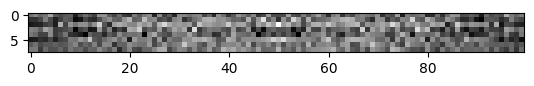

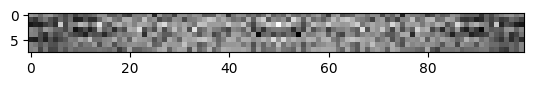

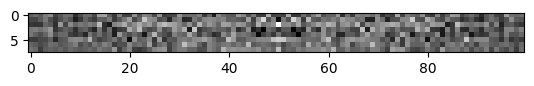

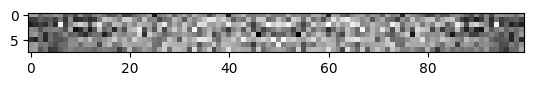

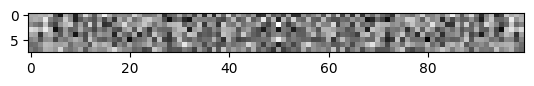

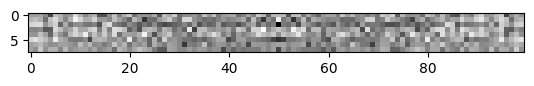

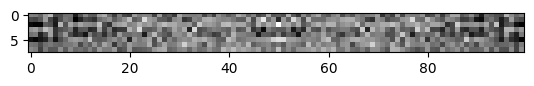

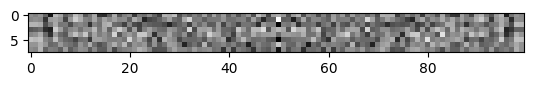

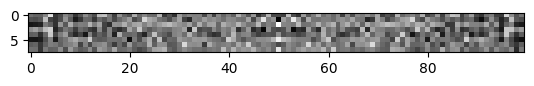

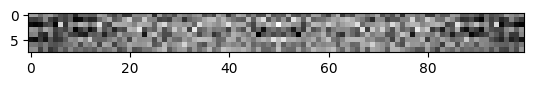

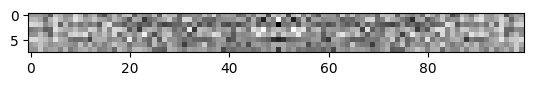

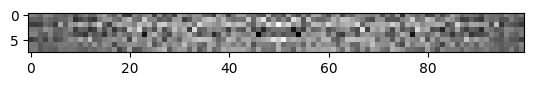

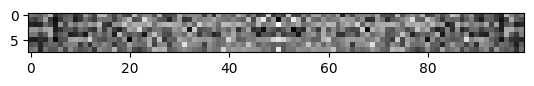

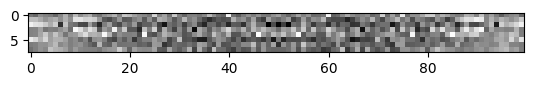

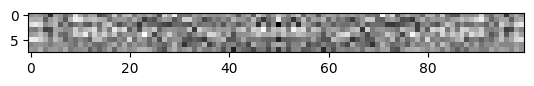

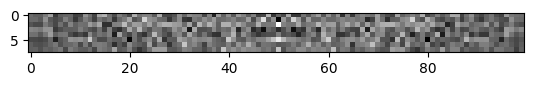

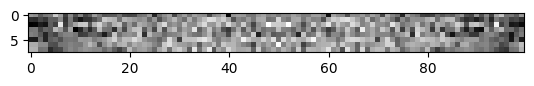

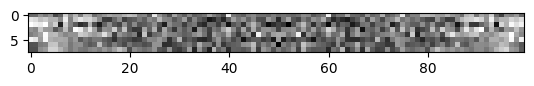

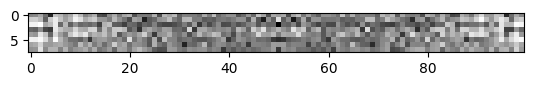

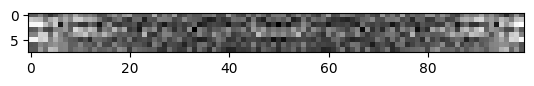

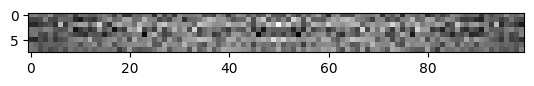

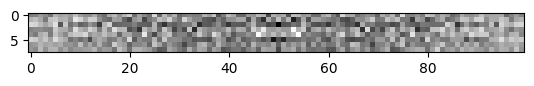

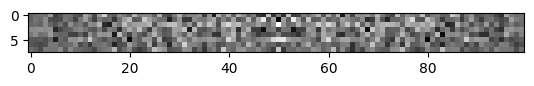

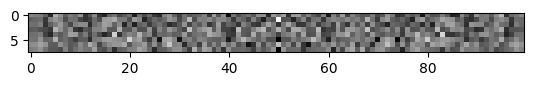

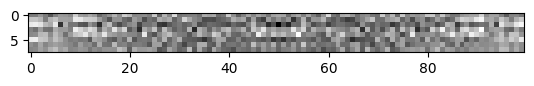

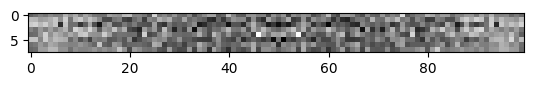

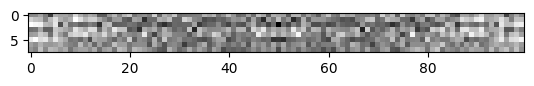

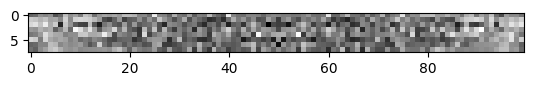

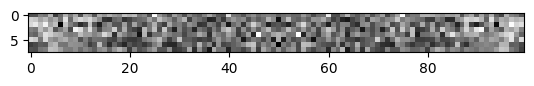

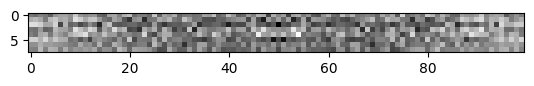

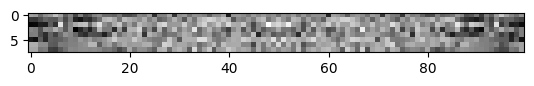

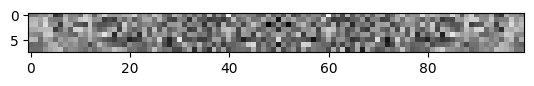

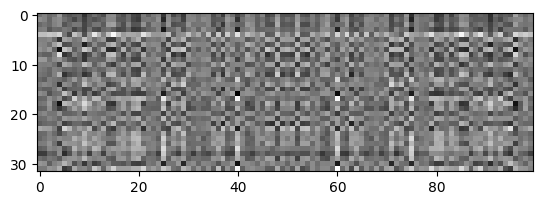

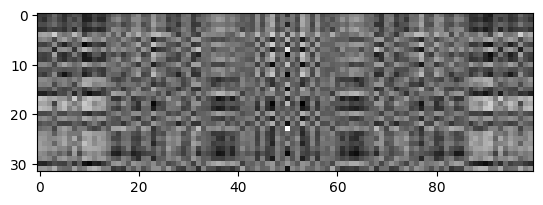

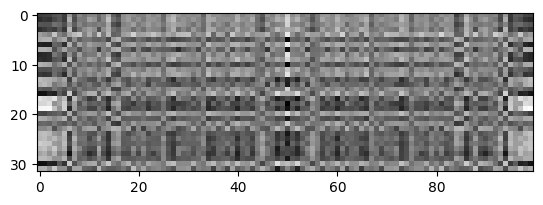

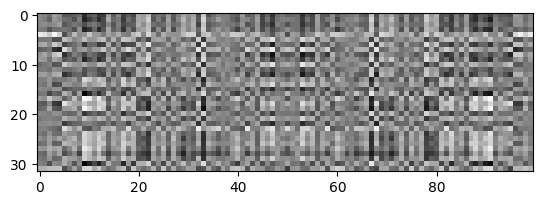

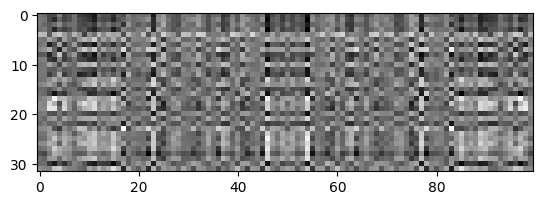

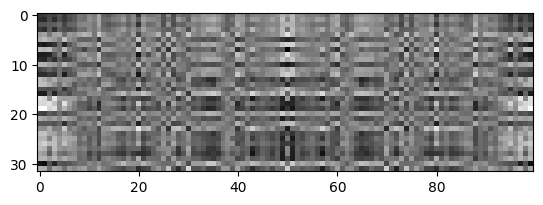

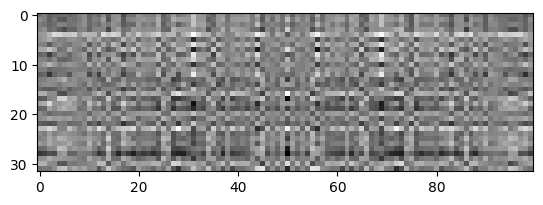

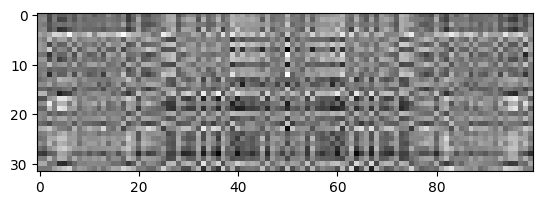

Conv1d(8, 2, kernel_size=(100,), stride=(1,))

In [ ]:
from prettytable import PrettyTable

def count_parameters(model):
    conv1RAW = None
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad:
            continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params += params
        if name == "conv1FFT.weight":
          conv1RAW=parameter
    print(table)
    print(f"Total Trainable Params: {total_params}")


    print(conv1RAW.shape)
    print(np.min(conv1RAW[:,:,:].cpu().detach().numpy()))
    print(np.max(conv1RAW[:,:,:].cpu().detach().numpy()))

    for i in range(conv1RAW.shape[0]):
      plt.imshow(conv1RAW[i,:,:].cpu().detach().numpy(),cmap='gray')
      plt.show()


    for i in range(conv1RAW.shape[1]):
      plt.imshow(conv1RAW[:,i,:].cpu().detach().numpy(),cmap='gray')
      plt.show()

count_parameters(model)


inputChannels = 8
Convertions_Layer = 2
nn.Conv1d(inputChannels, Convertions_Layer, kernel_size=100, padding=0, stride=1)



Load a saved model and test with sub8 and randomsub1

In [ ]:
#@title Evaluate model on training data from sub 8 and random



# oneModel = HyperResult[lowestIdx]
# lr = oneModel["learning_rate"]
# Convertions_Layer = oneModel["Convertions_Layer"]
# optimizer_name = oneModel["optimizer_name"]
# print(f"lr: {lr}")
# print(f"Convertions_Layer: {Convertions_Layer}")
# print(f"optimizer_name: {optimizer_name}")
# valid_acc_history = oneModel["Validation Accuracy"]


# # ModelName = HyperResult[i]["SavingName"]



# torch.manual_seed(0)
lr = 0.001
Convertions_Layer = 32
optimizer = "Adam"
model,optimizer,criterion = GetCombinationsModels(
    learning_rate=lr,
    Convertions_Layers=Convertions_Layer,
    optimizer_name=optimizer)

# ModelName = f"lr_{lr}_Conv_{Convertions_Layer}_opt_{optimizer_name}.pth"
ModelName = "model_acuuracy_72.77777862548828_lr_0.001_Conv_8_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7"
ModelName = "model_acuuracy_81.31578826904297_lr_0.001_Conv_32_opt_Adam_Traindon_CombinedData_Hand_s2s3s5s6s7"
ModelName = "BestModel/best_model_model_acuuracy_59.0_lr_0.001_Conv_32_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7"

print(ModelName)




model.load_state_dict(torch.load(ModelName+".pth", weights_only=True,map_location=torch.device('cpu')))
model.eval()

BestModel/best_model_model_acuuracy_59.0_lr_0.001_Conv_32_opt_Adam_Traindon_CombinedData_Head_s2s3s5s6s7


LogisticRegressionModel(
  (Relu): ReLU()
  (conv1RAW): Conv1d(8, 32, kernel_size=(100,), stride=(1,))
  (conv1FFT): Conv1d(8, 32, kernel_size=(100,), stride=(1,))
  (linearRaw): Linear(in_features=32, out_features=32, bias=True)
  (linearFFT): Linear(in_features=32, out_features=32, bias=True)
  (fcClass): Linear(in_features=64, out_features=6, bias=True)
  (act_output): Sigmoid()
  (probs): Softmax(dim=1)
)

In [ ]:


name = "CombinedData_Arm_s2s3s5s6s7s8"
name = "CombinedData_Head_s2s3s5s6s7s8"
name = "CombinedData_Hand_s2s3s5s6s7s8"

name = "CombinedData_Arm_rs1"

name = "CombinedData_Arm_s8"
name = "CombinedData_Hand_s8"
name = "CombinedData_Hand_rs1"
name = "CombinedData_Head_s8"
name = "CombinedData_Head_rs1"

with open('Data/'+name+'.npy', 'rb') as f:
    raw_org = np.load(f)
    label_org = np.load(f)

print(raw_org.shape)
print(label_org.shape)

raw_org = raw_org[:,:-1]
label_org = label_org[:,0]
print()
print(raw_org.shape)
print(label_org.shape)






print(raw_org.shape)
print(label_org.shape)

#Find the distribution of the

movement_mapping = {
  0.0: "NA",
  1.0: "No movement",
  2.0: "piano",
  3.0: "fist",
  4.0: "grib",
  5.0: "punch"
}

all_lables = pd.Series(label_org)
all_lables = all_lables.map(movement_mapping)
all_lables.value_counts()

#calculate the procentage
InfoL0 = all_lables.value_counts(dropna=True)
InfoL1 = all_lables.value_counts(dropna=True,normalize=True)

info = pd.concat([InfoL0, np.round(InfoL1,2)], axis=1)
display(info)




raw_org_tensor = torch.tensor(raw_org, dtype=torch.float32)
label_org_tensor = torch.tensor(label_org, dtype=torch.long)

print(raw_org_tensor.shape)

# fig = plt.figure(figsize = (20,4))
# plt.plot(raw_org_tensor[:,-2])
# plt.plot(raw_org_tensor[:,-1])
# plt.plot(label_org_tensor/5)


(24704, 9)
(24704, 3)

(24704, 8)
(24704,)
(24704, 8)
(24704,)


count  proportion
No movement  12632        0.51
grib          4902        0.20
piano         3171        0.13
punch         2105        0.09
fist          1894        0.08

torch.Size([24704, 8])


In [ ]:

windowSize_Sec = 1.0
overlap_Sec = 0.0

segmented_data_tensor, segmented_fft_tensor,labled_data_samplewise_tensor, labled_data_dominate_tensor = segment_and_classify(raw_org_tensor,label_org_tensor,window_size_s=windowSize_Sec,overlap_s=overlap_Sec)

print(segmented_data_tensor.shape)
print(label_org_tensor.shape)
print(labled_data_dominate_tensor.shape)


def concatSignal(signalLen, SegmentedLabel):
  LabelPrSample = []
  LabelPrSample = torch.zeros(signalLen)

  print(LabelPrSample.shape)

  for idx, lable in enumerate(SegmentedLabel):

    segment = torch.ones(100)*SegmentedLabel[idx]
    LabelPrSample[idx*100:idx*100+100] = segment


  print(LabelPrSample.shape)
  return LabelPrSample

LabelPrSample= concatSignal(len(raw_org_tensor),labled_data_dominate_tensor)
# fig = plt.figure(figsize = (20,4))
# plt.plot(LabelPrSample.detach().numpy())
# plt.plot(label_org_tensor.detach().numpy()-0.1)

# plt.plot(raw_org_tensor[:,-2]*5)
# plt.plot(raw_org_tensor[:,-1]*5)
# plt.show()


train_dist = compute_distribution(labled_data_dominate_tensor, "Total Random")



torch.Size([247, 8, 100])
torch.Size([24704])
torch.Size([247])
torch.Size([24704])
torch.Size([24704])
Total Random Distribution:
 Value  Count  Percentage
     1    129        52.2
     2     32        13.0
     3     18         7.3
     4     49        19.8
     5     19         7.7



In [ ]:


radomdata = {}

radomdata['data_raw'] = segmented_data_tensor
radomdata['data_fft'] = segmented_fft_tensor
radomdata['target_overall'] = labled_data_dominate_tensor
radomdata['target_samplewise'] = labled_data_samplewise_tensor




raw_tensor = radomdata['data_raw']
fft_tensor = radomdata['data_fft']
target_overall_tensor = radomdata['target_overall']
target_samplewise_tensor = radomdata['target_samplewise']


display("___her____________________")
# loss = raw_tensor  # Ensure `some_tensor` has `requires_grad=True`
print(raw_tensor.requires_grad)  # Should print True
print(fft_tensor.requires_grad)  # Should print True
display("___der____________________")


fft_tensor=fft_tensor.abs()






print(f"  Raw Shape:_________________________{raw_tensor.shape}")
print(f"  FFT Shape:_________________________{fft_tensor.shape}")
print(f"  Overall Target Shape:______________{target_overall_tensor.shape}")
print(f"  Samplewise Target Shape:___________{target_samplewise_tensor.shape}")


#detach and make it to tensor again
raw_tensor = raw_tensor.detach().clone()
fft_tensor = fft_tensor.detach().clone()

raw_tensor.requires_grad_()
fft_tensor.requires_grad_()



ds = TensorDataset(
    raw_tensor.float(),
    fft_tensor.float(),
    target_overall_tensor,
    target_samplewise_tensor
    )

Head_random_dl = DataLoader(ds, batch_size=256, shuffle=False, num_workers=0)



# splits_Random = split_balanced_data((segmented_data_tensor, segmented_fft_tensor), (labled_data_dominate_tensor,labled_data_samplewise_tensor),
#                              train_ratio=0.0,
#                              val_ratio=0.0,
#                              test_ratio=1.0
#                              )


# Head_random_ds, Head_random_dl = create_loaders(radomdata, bs=128,jobs=0)


'___her____________________'

True
True


'___der____________________'

  Raw Shape:_________________________torch.Size([247, 8, 100])
  FFT Shape:_________________________torch.Size([247, 8, 100])
  Overall Target Shape:______________torch.Size([247])
  Samplewise Target Shape:___________torch.Size([247, 100])


Try to predict the new random signal

              precision    recall  f1-score   support

          NO       1.00      0.07      0.13       129
       Piano       0.17      0.16      0.16        32
        Fist       0.19      0.28      0.22        18
        Grib       0.26      0.67      0.37        49
       Punch       0.26      0.74      0.38        19

    accuracy                           0.27       247
   macro avg       0.37      0.38      0.25       247
weighted avg       0.63      0.27      0.21       247



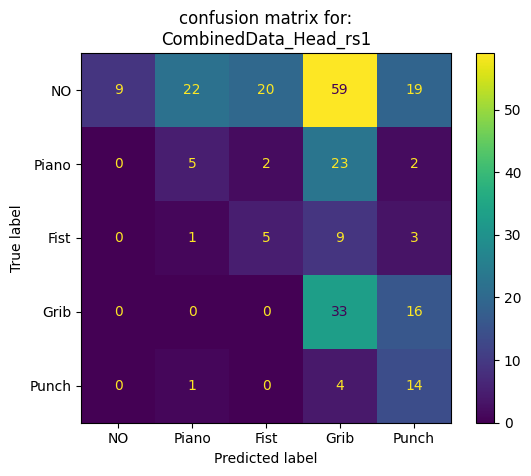

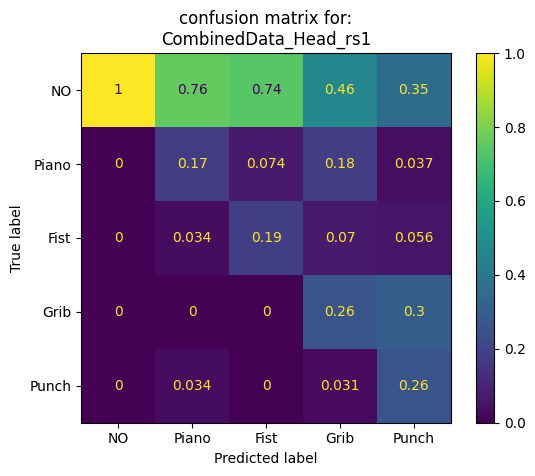

torch.Size([24704])
torch.Size([24704])
torch.Size([24704])
torch.Size([24704])


In [ ]:
target_names=["NO","Piano","Fist","Grib","Punch"]

iter_test = 0
predicteds = []
y_trues = []
model.eval()

x_raws = []
for  x_raw, x_fft, true_overall_value, true_samplewise_value in Head_random_dl:

    iter_test += 1
    images = x_raw.requires_grad_().to(device)
    x_fft = x_fft.requires_grad_().to(device)


    # Forward pass only to get logits/output
    input = torch.cat((images,x_fft), 1)
    outputs = model(input)

    _, predicted = torch.max(outputs.data, 1)

    if iter_test == 1:
        y_trues = true_overall_value
        x_raws = x_raw
        predicteds = predicted
    else:
        predicteds = torch.cat((predicteds,predicted),0)
        y_trues = torch.cat((y_trues,true_overall_value),0)
        x_raws = torch.cat((x_raws,x_raw),0)


pred = predicteds.detach().cpu().numpy()
y_Trues= y_trues.detach().cpu().numpy()

cm = confusion_matrix(y_Trues, pred)
# break
# print(cm)

#report
print(classification_report(y_Trues, pred,target_names=target_names,labels=np.unique(y_Trues) ,zero_division=0 ))


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=target_names)
disp.plot()
plt.title(f"confusion matrix for:\n{name}")
plt.show()

cm = confusion_matrix(y_Trues, pred,normalize="pred")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=target_names)
disp.plot()
plt.title(f"confusion matrix for:\n{name}")
plt.show()


# printPred(y_Trues,-pred,fra=0,org=x_raws[:,-1,:])



y_Trues_PrSample= concatSignal(len(raw_org_tensor),y_Trues)
pred_PrSample= concatSignal(len(raw_org_tensor),pred)

# fig = plt.figure(figsize = (20,4))

# plt.plot(y_Trues_PrSample.detach().numpy())

# plt.plot(pred_PrSample.detach().numpy()-0.2)

# plt.plot(raw_org_tensor.detach().numpy())
# plt.show()






In [ ]:


import plotly.express as px
import plotly.graph_objects as go


# ser1 = pd.Series(, copy=False)


ser1 = pd.Series(pred_PrSample.detach().numpy()).array

def plotDataWithInteractive(data):

  fig = px.line(data,x="Timeline",y=['Pred','True'])

  fig.update_xaxes(
      rangeslider_visible=True
  )
  fig.show()


plotdata = {}

fs = 100
st = 1/fs
print(st)
d = np.arange(start=0, stop=len(pred_PrSample)/fs,step = st)
print(d[:5])
print(d[-5:])
print(len(d))


print(raw_org_tensor[:,-2].shape)
print(pred_PrSample.shape)


f = pd.DataFrame({'Timeline': d,
                   'Pred': pred_PrSample.detach().numpy(),
                   'True': y_Trues_PrSample.detach().numpy(),
                   'Raw1':raw_org_tensor[:,-2],
                   'Raw2':raw_org_tensor[:,-1],
                   })

fig = px.line(f,x="Timeline",y=['Pred','True','Raw1','Raw2'])

fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()







0.01
[0.   0.01 0.02 0.03 0.04]
[246.99 247.   247.01 247.02 247.03]
24704
torch.Size([24704])
torch.Size([24704])


In [ ]:
from plotly.subplots import make_subplots


def plotInteractive(df,Match,d):
    fig = go.Figure()

    fig = make_subplots(specs=[[{"secondary_y": True}]])
    colors = px.colors.qualitative.Plotly
    print("colors " + str(len(colors)))
    print("df.columns " + str(len(df.columns)))

    # set up multiple traces
    for col in df.columns:
        if any(element in col for element in ["Match"]):
           fig.add_trace(go.Scatter(
            x = d,
            y=Match*0.5,
            fill="tozeroy",
            mode="lines",
            line_color="darkblue",
            opacity=0.001,
            name=col,
            visible=True,
            ),


               secondary_y=True,
                  )

        if any(element in col for element in ["y_pred","y_true"]):
            # print("PLOT YPRED")
            fig.add_trace(go.Scatter(x=df.index,
                                    y=df[col],
                                    name  = col,
                                    visible=True
                                    ),
                                    secondary_y=True
                        )

        else:
            fig.add_trace(go.Scatter(x=df.index,
                                y=df[col],
                                name  = col,
                                visible=True
                                )
                        )




    um = [ {} for _ in range(len(df.columns)) ]
    buttons = []
    menuadjustment = 0.15

    buttonX = -0.1
    buttonY = 1 + menuadjustment
    for i, col in enumerate(df.columns):
        button = dict(method='restyle',
                    label=col,
                    visible=True,
                    args=[{'visible':True,
                            'line.color' : colors[i%10]}, [i]],
                    args2 = [{'visible': False,
                                'line.color' : colors[i%10]}, [i]],
                    )

        # adjust some button features
        buttonY = buttonY-menuadjustment
        um[i]['buttons'] = [button]
        um[i]['showactive'] = False
        um[i]['y'] = buttonY
        um[i]['x'] = buttonX

    # add a button to toggle all traces on and off
    button2 = dict(method='restyle',
                label='All',
                visible=True,
                args=[{'visible':True}],
                args2 = [{'visible': False}],
                )
    # assign button2 to an updatemenu and make some adjustments
    um.append(dict())
    um[i+1]['buttons'] = [button2]
    um[i+1]['showactive'] = True
    um[i+1]['y']=buttonY - menuadjustment
    um[i+1]['x'] = buttonX

    # add dropdown menus to the figure
    fig.update_layout(showlegend=True, updatemenus=um)

    fig.update_xaxes(
        rangeslider_visible=True
    )
    # adjust button type
    for m in fig.layout.updatemenus:
        m['type'] = 'buttons'

    # f = fig.full_figure_for_development(warn=False)
    fig.show()





print(target_names)
plotdata = pd.DataFrame(raw_org_tensor, columns=['x:left','y:left','z:left','x:rigth','y:rigth','z:rigth','meg:left','meg:right'])

plotdata['Timeline_s'] = d
plotdata['y_pred'] = pred_PrSample.detach().numpy()
plotdata['y_true'] = y_Trues_PrSample.detach().numpy()
plotdata = plotdata.set_index(['Timeline_s'])
plotdata.info()
# # df = df.cumsum()
Match = plotdata['y_true']==plotdata['y_pred']
plotdata['Match'] = Match

plotInteractive(plotdata,Match,d)

['NO', 'Piano', 'Fist', 'Grib', 'Punch']
<class 'pandas.core.frame.DataFrame'>
Index: 24704 entries, 0.0 to 247.03
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   x:left     24704 non-null  float32
 1   y:left     24704 non-null  float32
 2   z:left     24704 non-null  float32
 3   x:rigth    24704 non-null  float32
 4   y:rigth    24704 non-null  float32
 5   z:rigth    24704 non-null  float32
 6   meg:left   24704 non-null  float32
 7   meg:right  24704 non-null  float32
 8   y_pred     24704 non-null  float32
 9   y_true     24704 non-null  float32
dtypes: float32(10)
memory usage: 1.1 MB
colors 10
df.columns 11


Plot the random signal, with both True Classification and Predicted

Therefor will The signal først be voted for each sample

In [ ]:


def ExtractInformation(label_org,name=None,printer=False):
    # label_org[label_org>3.1] = 5.0
    # label_org[label_org<3.1] = 1.0


    #Find the distribution of the

    movement_mapping = {
    0.0: "NA",
    1.0: "No movement",
    2.0: "piano",
    3.0: "fist",
    4.0: "grib",
    5.0: "punch"
    }


    all_lables = pd.Series(label_org)
    all_lables = all_lables.map(movement_mapping)


    # Print procentage of movements

    InfoL0 = all_lables.value_counts(dropna=True)
    InfoL1 = all_lables.value_counts(dropna=True,normalize=True)
    fs = 100
    LengthOfMovements = InfoL0/fs
    LengthOfMovements = pd.Series(LengthOfMovements,name="Len_s")


    info = pd.concat([InfoL0, np.round(InfoL1,2),LengthOfMovements], axis=1)
    display(info)






    diff = np.diff(label_org)
    diff = (diff**2)**0.5
    # diff
    # diff = diff/np.max(diff)
    diff[diff>0.01] = 1
    diff = pd.Series(diff)

    # plt.figure(figsize=(15,4))
    # plt.plot(all_lables)
    # plt.plot(diff)
    # # plt.xlim((25000,30000))
    # plt.show()

    #get index for where diff are not 0

    trigger_count = diff[diff == 1].count()
    trigger_Idx = diff[diff == 1].index

    # print(trigger_count)

    # print(trigger_Idx)



    # plt.figure(figsize=(15,4))
    # plt.plot(all_lables)
    # plt.plot(diff)
    # plt.show()

    if printer:
        plt.figure(figsize=(15,4))
        plt.plot(label_org)
        plt.plot(diff)
    # plt.xlim((700-5,1194+5))

    fs = 100


    info = {}
    info["0.0"] = []
    info["1.0"] = []
    info["2.0"] = []
    info["3.0"] = []
    info["4.0"] = []
    info["5.0"] = []
    for i, idx in enumerate(trigger_Idx):
        if i == 0:
            s1 = 0
            s2 = (trigger_Idx[i])
        else:
            s1 = (trigger_Idx[i-1]+1)
            s2 = (trigger_Idx[i])

        section = (label_org[s1:s2])
        xlin = np.arange(s1,s2)
        if printer:
            plt.plot(xlin,section,linewidth=5)
        sectionLen = len(section)/fs

        info[str(section[0])].append(sectionLen)



    # plt.xlim((0,10000))
    if printer:
        plt.show()


    def movementInfo(info,name=""):
        TotalLen = np.sum(info)
        N_Movements = len(info)
        if N_Movements>0:
            std_len = np.std(info)
            mean_len = np.mean(info)
        else:
            std_len = 0
            mean_len = 0
        print(f"Information for: {name} \t Total len: {np.round(TotalLen,2)}s \t N_movements: {N_Movements} \t mean lenght: {np.round(mean_len,2)}s    \t std lenght: {np.round(std_len,2)}s")


    movementInfo(info["0.0"],name)
    movementInfo(info["1.0"],name)
    movementInfo(info["2.0"],name)
    movementInfo(info["3.0"],name)
    movementInfo(info["4.0"],name)
    movementInfo(info["5.0"],name)



with open('OnePredAndTrue'+'.npy', 'wb') as f:
  np.save(f, plotdata['y_pred'])
  np.save(f, plotdata['y_true'])


with open('OnePredAndTrue'+'.npy', 'rb') as f:

    pred = np.load(f)
    true = np.load(f)

print("PRED")
ExtractInformation(pred,name="Pred")
print("__________________________________________________________________")
print("Ture")
ExtractInformation(true,name="True")

PRED


count  proportion   Len_s
grib         12800        0.52  128.00
punch         5400        0.22   54.00
piano         2900        0.12   29.00
fist          2700        0.11   27.00
No movement    900        0.04    9.00
NA               4        0.00    0.04

Information for: Pred 	 Total len: 0.0s 	 N_movements: 0 	 mean lenght: 0s    	 std lenght: 0s
Information for: Pred 	 Total len: 8.91s 	 N_movements: 9 	 mean lenght: 0.99s    	 std lenght: 0.0s
Information for: Pred 	 Total len: 28.81s 	 N_movements: 19 	 mean lenght: 1.52s    	 std lenght: 0.88s
Information for: Pred 	 Total len: 26.81s 	 N_movements: 19 	 mean lenght: 1.41s    	 std lenght: 0.94s
Information for: Pred 	 Total len: 127.55s 	 N_movements: 45 	 mean lenght: 2.83s    	 std lenght: 1.92s
Information for: Pred 	 Total len: 53.79s 	 N_movements: 21 	 mean lenght: 2.56s    	 std lenght: 2.99s
__________________________________________________________________
Ture


count  proportion   Len_s
No movement  12900        0.52  129.00
grib          4900        0.20   49.00
piano         3200        0.13   32.00
punch         1900        0.08   19.00
fist          1800        0.07   18.00
NA               4        0.00    0.04

Information for: True 	 Total len: 0.0s 	 N_movements: 0 	 mean lenght: 0s    	 std lenght: 0s
Information for: True 	 Total len: 128.73s 	 N_movements: 27 	 mean lenght: 4.77s    	 std lenght: 2.48s
Information for: True 	 Total len: 31.92s 	 N_movements: 8 	 mean lenght: 3.99s    	 std lenght: 1.32s
Information for: True 	 Total len: 17.96s 	 N_movements: 4 	 mean lenght: 4.49s    	 std lenght: 1.12s
Information for: True 	 Total len: 48.92s 	 N_movements: 8 	 mean lenght: 6.12s    	 std lenght: 2.26s
Information for: True 	 Total len: 18.93s 	 N_movements: 7 	 mean lenght: 2.7s    	 std lenght: 1.16s


In [ ]:
# # print(extrationInfo)
# with open('OnePredAndTrue'+'.npy', 'wb') as f:
#   np.save(f, plotdata['y_pred'])
#   np.save(f, plotdata['y_true'])


# with open('OnePredAndTrue'+'.npy', 'rb') as f:
# #
#     pred = np.load(f)
#     true = np.load(f)


# print(pred.shape)
# print(true.shape)

# print(true[0:10])

torch.Size([247, 8, 100])
torch.Size([247, 8, 100])
torch.Size([247, 100])
torch.Size([247])

torch.Size([493, 8, 100])
torch.Size([493, 8, 100])
torch.Size([493, 100])
torch.Size([493])
________________________________________________________________


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning:

A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2642: UserWarning:

labels size, 1, does not match size of target_names, 5



Head_random_dl
              precision    recall  f1-score   support

          NO       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (5).

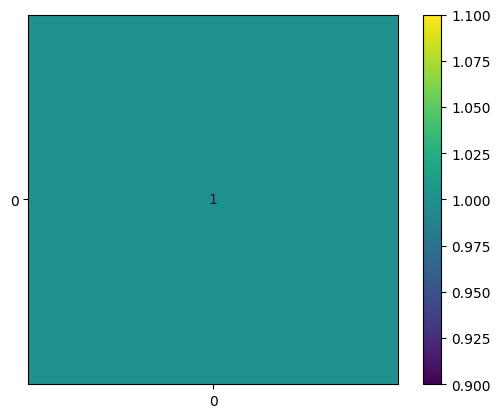

In [ ]:
windowSize_Sec = 1.0
overlap_Sec = 0.0

segmented_data_tensor, segmented_fft_tensor,labled_data_samplewise_tensor, labled_data_dominate_tensor = segment_and_classify(raw_org_tensor,label_org_tensor,window_size_s=windowSize_Sec,overlap_s=overlap_Sec)

orgLableLen = labled_data_dominate_tensor.detach().clone()
label_org_tensor_len = label_org_tensor.detach().clone()

print(segmented_data_tensor.shape)
print(segmented_fft_tensor.shape)
print(labled_data_samplewise_tensor.shape)
print(labled_data_dominate_tensor.shape)

print()
windowSize_Sec = 1.0
overlap_Sec = 0.5

segmented_data_tensor, segmented_fft_tensor,labled_data_samplewise_tensor, labled_data_dominate_tensor = segment_and_classify(raw_org_tensor,label_org_tensor,window_size_s=windowSize_Sec,overlap_s=overlap_Sec)



print(segmented_data_tensor.shape)
print(segmented_fft_tensor.shape)
print(labled_data_samplewise_tensor.shape)
print(labled_data_dominate_tensor.shape)






raw_tensor = segmented_data_tensor
fft_tensor = segmented_fft_tensor
fft_tensor=fft_tensor.abs()
target_overall_tensor = labled_data_dominate_tensor
target_samplewise_tensor = labled_data_samplewise_tensor

#detach and make it to tensor again
raw_tensor = raw_tensor.detach().clone()
fft_tensor = fft_tensor.detach().clone()

ds = TensorDataset(
    raw_tensor.float(),
    fft_tensor.float(),
    target_overall_tensor,
    target_samplewise_tensor
    )

Head_random_dl = DataLoader(ds, batch_size=1, shuffle=False, num_workers=0)




print("________________________________________________________________")
y_trues, predicteds, probs = PredAndShowStats(model,Head_random_dl,device,"Head_random_dl")

In [ ]:

print(m.weight)
print(torch.ones_like(m.weight) * 0.3)
print(torch.nn.Parameter(torch.ones_like(m.weight)/3))

In [ ]:

def VoteOutput(signal):

  convo = nn.Conv1d(1, 1, 3, stride=2,padding =1,bias=False)
  convo = nn.Conv1d(1, 1, 5, stride=2,padding =2,bias=False)
  convo = nn.Conv1d(1, 1, 7, stride=2,padding =3,bias=False)
  # print(convo.weight)
  # print(m.weight.shape)


  # print(signal.shape )

  dd = torch.tensor([[[1,5,1]]])
  dd = torch.tensor([[[1,3,5,3,1]]])
  dd = torch.tensor([[[0,0,0,9,3,1,1]]])
  s = (torch.sum(dd))
  convo.weight =torch.nn.Parameter(dd/s)
  # print(convo.weight)




  if len(signal.shape) == 3:
    signal = signal.permute((2,1,0))
  # print(signal.shape )


  signal = signal.float()
  if len(signal.shape) == 1:
    signal = torch.unsqueeze(signal, 0)
  # y = y_trues.float()
  # print(signal.shape)
  # print("befor covn")
  o = convo(signal)
  # print(o)

  o = o.squeeze()
  # print(o.shape)

  if len(o.shape) == 2:
    o  = o.permute((1,0))

  return o



org_Covn = VoteOutput(y_trues.cpu().detach().clone())
org_predicteds = VoteOutput(predicteds.cpu().detach().clone())

org_probs = VoteOutput(torch.tensor(probs))
EnsamplePred = torch.argmax(org_probs, dim=1)

print(org_Covn.shape)
print(org_predicteds.shape)

print("\n Probs")
print(org_probs.shape)
print(EnsamplePred.shape)


org = orgLableLen.detach().numpy()
org_Covn = org_Covn.detach().numpy()
org_predicteds = org_predicteds.detach().numpy()
org_EnsamplePred = EnsamplePred.detach().numpy()


print(org_Covn.shape)
print(org_predicteds.shape)

print("\n Probs")
print(org_probs.shape)
print(EnsamplePred.shape)




s = np.sum(org== org_Covn)
print(s)
plt.figure(figsize=(35,5))
plt.plot(org,linewidth=2,label='org_')
# plt.plot(label_org_tensor_len,linewidth=2,label='org_')
# plt.plot(org_Covn,label='org_covn')
plt.plot(org_predicteds,linewidth=2,label='predicteds')
plt.plot(EnsamplePred,"-",linewidth=2,label='EnsamplePred')
plt.plot(np.round(org_predicteds,0),":",linewidth=4,label='predicteds - int')
plt.legend()
plt.show()


In [ ]:
EnsamplePred
org_pred = np.round(org_predicteds,0)
org

print()

ShowStatsForModel(org,org_pred,"Singel pred")
ShowStatsForModel(org,EnsamplePred,"Emsample pred")


In [ ]:
windowSize_Samples = int(windowSize_Sec*100)
moveingOverlab_Samples = int(overlap_Sec*100)



y_trues, predicteds, probs




print(orgLableLen.shape)
print(y_trues.shape)
# plt.figure(figsize=(25,5))
# plt.plot(orgLableLen)
# plt.plot(y_trues)
# plt.show()


#Upsize signal

orgLableLenUp = None
orglen = 0
for i in y_trues:
  orglen += 50 #overlab
  Up = torch.ones(100)*i#Windows
  Up = Up.unsqueeze(0)
  if orgLableLenUp == None:
    orgLableLenUp = Up
  else:
    orgLableLenUp = torch.cat((orgLableLenUp, Up), axis=0)

print()
print(orgLableLenUp.shape)
print(y_trues.shape)


In [ ]:


# print(orglen)
# print(len(orgLableLenUp))
# orgLableLenUp[0]


print()
print("combine")
Combined = torch.ones(orglen+100)
index= 0
for i in orgLableLenUp:
  if Combined == None:
    Combined = i
  else:
    index += 0 #overlab
    w = index+100 #Windows
    Combined[index:w] += i
    # Combined[index:w] = Combined[index:w]/2



print("combined ")
# print(" ")
# print(Combined[-150:])
# print(orgLableLenUp[0])
# print(orgLableLenUp[1])


plt.figure(figsize=(25,5))
plt.plot(label_org_tensor_len)
plt.plot(Combined)
plt.show()